# Proliferative genes TPM distribution per species

In [2]:
suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(gridExtra))
suppressMessages(library(colortools))
suppressMessages(library(colorspace))
suppressMessages(library(grid))

In [3]:
# Loading previous R session, which has the standard-10 wholeLength and exonLength tables to calculate TPM.

load(paste0("/Shares/txpnevol/daniel/panSpeciesGeneAnnotation/misc/standardGeneAnnotationSession.RData"))

# Concatenates the gene length tables onto a single data frame.
species_10_geneList_wholeLengths <- rbind(species_10_geneList_wholeLengths, 
                                          p53_list_missing_wholeLengths, 
                                          PI_list_missing_wholeLengths)
species_10_geneList_exonlengths <- rbind(species_10_geneList_exonlengths, 
                                         p53_list_missing_exonlengths, 
                                         PI_list_missing_exonlengths)

# Divides the gene lengths by 1000 to do the TPM calculations.
species_10_geneList_wholeLengths_kb <- species_10_geneList_wholeLengths
species_10_geneList_wholeLengths_kb$Human <- species_10_geneList_wholeLengths_kb$Human / 1000
species_10_geneList_wholeLengths_kb$Chimp <- species_10_geneList_wholeLengths_kb$Chimp / 1000
species_10_geneList_wholeLengths_kb$Bonobo <- species_10_geneList_wholeLengths_kb$Bonobo / 1000
species_10_geneList_wholeLengths_kb$Gorilla <- species_10_geneList_wholeLengths_kb$Gorilla / 1000
species_10_geneList_wholeLengths_kb$Orangutan <- species_10_geneList_wholeLengths_kb$Orangutan / 1000
species_10_geneList_wholeLengths_kb$Gibbon <- species_10_geneList_wholeLengths_kb$Gibbon / 1000
species_10_geneList_wholeLengths_kb$Rhesus <- species_10_geneList_wholeLengths_kb$Rhesus / 1000
species_10_geneList_wholeLengths_kb$Baboon <- species_10_geneList_wholeLengths_kb$Baboon / 1000
species_10_geneList_wholeLengths_kb$SquirrelMonkey <- species_10_geneList_wholeLengths_kb$SquirrelMonkey / 1000
species_10_geneList_wholeLengths_kb$OwlMonkey <- species_10_geneList_wholeLengths_kb$OwlMonkey / 1000

In [4]:
# Defines the PI gene set.

genes_PI <- c("ARHGEF39","ATAD2","AURKB","BIRC5","BRCA1","BUB1","BUB1B","CCNA2","CCNB1","CCNB2","CCNE1","CCNE2",
           "CCNF","CDC20","CDC25A","CDC45","CDC6","CDK1","CDK2","CDKN3","CENPA","CENPE","E2F1","ESCO2","FAM83D",
           "GMNN","GTSE1","HJURP","HMMR","KIF11","KIF20B","KIF23","KIF4A","MAD2L1","MCM2","MCM4","MCM5","MCM6",
           "MKI67","MYBL2","NUF2","NUSAP1","PLK1","PRC1","RFC3","RFC4","RRM2","TACC3","TOP2A","TPX2","UBE2C",
           "CDKN1A")

IDs_PI <- c("ENSG00000137135","ENSG00000156802","ENSG00000178999","ENSG00000089685","ENSG00000012048",
         "ENSG00000169679","ENSG00000156970","ENSG00000145386","ENSG00000134057","ENSG00000157456",
         "ENSG00000105173","ENSG00000175305","ENSG00000162063","ENSG00000117399","ENSG00000164045",
         "ENSG00000093009","ENSG00000094804","ENSG00000170312","ENSG00000123374","ENSG00000100526",
         "ENSG00000115163","ENSG00000138778","ENSG00000101412","ENSG00000171320","ENSG00000101447",
         "ENSG00000112312","ENSG00000075218","ENSG00000123485","ENSG00000072571","ENSG00000138160",
         "ENSG00000138182","ENSG00000137807","ENSG00000090889","ENSG00000164109","ENSG00000073111",
         "ENSG00000104738","ENSG00000100297","ENSG00000076003","ENSG00000148773","ENSG00000101057",
         "ENSG00000143228","ENSG00000137804","ENSG00000166851","ENSG00000198901","ENSG00000133119",
         "ENSG00000163918","ENSG00000171848","ENSG00000013810","ENSG00000131747","ENSG00000088325",
         "ENSG00000175063")

# Initializes the dataframes that will contain the TPM per species per PI gene.
colNames <- c("Human","Chimp","Bonobo","Gorilla","Orangutan","Gibbon","Rhesus","Baboon","SquirrelMonkey","OwlMonkey")
DMSO_TPM_PI_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(DMSO_TPM_PI_species) <- colNames
rownames(DMSO_TPM_PI_species) <- genes_PI
Nutlin_TPM_PI_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(Nutlin_TPM_PI_species) <- colNames
rownames(Nutlin_TPM_PI_species) <- genes_PI

# Initializes the dataframes that will contain the TPM (rep1) per species per PI gene.
DMSO_TPM_PI_1_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(DMSO_TPM_PI_1_species) <- colNames
rownames(DMSO_TPM_PI_1_species) <- genes_PI
Nutlin_TPM_PI_1_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(Nutlin_TPM_PI_1_species) <- colNames
rownames(Nutlin_TPM_PI_1_species) <- genes_PI

# Initializes the dataframes that will contain the TPM (rep2) per species per PI gene.
DMSO_TPM_PI_2_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(DMSO_TPM_PI_2_species) <- colNames
rownames(DMSO_TPM_PI_2_species) <- genes_PI
Nutlin_TPM_PI_2_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(Nutlin_TPM_PI_2_species) <- colNames
rownames(Nutlin_TPM_PI_2_species) <- genes_PI

# Initializes the dataframes that will contain the TPM (rep3) per species per PI gene.
DMSO_TPM_PI_3_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(DMSO_TPM_PI_3_species) <- colNames
rownames(DMSO_TPM_PI_3_species) <- genes_PI
Nutlin_TPM_PI_3_species <- data.frame(matrix(ncol = length(colNames), nrow = length(genes_PI)))
colnames(Nutlin_TPM_PI_3_species) <- colNames
rownames(Nutlin_TPM_PI_3_species) <- genes_PI

In [6]:
##############################################
##############################################
                # DMSO values
##############################################
##############################################

start.time <- Sys.time()

##############################################
                   # Human
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Human.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Human.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Human <- counts$counts
counts_Human <- counts_Human[,!grepl("Nutlin", colnames(counts_Human))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Human <- data.frame(matrix(ncol = dim(counts_Human)[2], nrow = dim(counts_Human)[1]))
colnames(DMSO_RPK_Human) <- colnames(counts_Human)
rownames(DMSO_RPK_Human) <- rownames(counts_Human)
DMSO_TPM_Human <- data.frame(matrix(ncol = dim(counts_Human)[2]+1, nrow = dim(counts_Human)[1]))
colnames(DMSO_TPM_Human) <- c(colnames(counts_Human),"mean")
rownames(DMSO_TPM_Human) <- rownames(counts_Human)
PM_Human <- data.frame(matrix(ncol = dim(counts_Human)[2], nrow = 1))
colnames(PM_Human) <- colnames(counts_Human)
rownames(PM_Human) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Human)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Human[rownames(DMSO_RPK_Human) == gene,] <- counts_Human[rownames(counts_Human) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Human"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Human["PM", colnames(PM_Human) %in% "RNA-DMSO-Human-1"] <- (sum(DMSO_RPK_Human$`RNA-DMSO-Human-1`[complete.cases(DMSO_RPK_Human$`RNA-DMSO-Human-1`)]))/1000000
PM_Human["PM", colnames(PM_Human) %in% "RNA-DMSO-Human-2"] <- (sum(DMSO_RPK_Human$`RNA-DMSO-Human-2`[complete.cases(DMSO_RPK_Human$`RNA-DMSO-Human-2`)]))/1000000
PM_Human["PM", colnames(PM_Human) %in% "RNA-DMSO-Human-3"] <- (sum(DMSO_RPK_Human$`RNA-DMSO-Human-3`[complete.cases(DMSO_RPK_Human$`RNA-DMSO-Human-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Human$`RNA-DMSO-Human-1` <- DMSO_RPK_Human$`RNA-DMSO-Human-1`/PM_Human$`RNA-DMSO-Human-1`
DMSO_TPM_Human$`RNA-DMSO-Human-2` <- DMSO_RPK_Human$`RNA-DMSO-Human-2`/PM_Human$`RNA-DMSO-Human-2`
DMSO_TPM_Human$`RNA-DMSO-Human-3` <- DMSO_RPK_Human$`RNA-DMSO-Human-3`/PM_Human$`RNA-DMSO-Human-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Human)) {
    if(sum(is.na(DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, c("RNA-DMSO-Human-1","RNA-DMSO-Human-2","RNA-DMSO-Human-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "RNA-DMSO-Human-1"]
    rep2 <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "RNA-DMSO-Human-2"]
    rep3 <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "RNA-DMSO-Human-3"]
    DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Human"] <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Human"] <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "RNA-DMSO-Human-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Human"] <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "RNA-DMSO-Human-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Human"] <- DMSO_TPM_Human[rownames(DMSO_TPM_Human) == gene, "RNA-DMSO-Human-3"] }

##############################################
                   # Chimp
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Chimp.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Chimp.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Chimp <- counts$counts
counts_Chimp <- counts_Chimp[,!grepl("Nutlin", colnames(counts_Chimp))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Chimp <- data.frame(matrix(ncol = dim(counts_Chimp)[2], nrow = dim(counts_Chimp)[1]))
colnames(DMSO_RPK_Chimp) <- colnames(counts_Chimp)
rownames(DMSO_RPK_Chimp) <- rownames(counts_Chimp)
DMSO_TPM_Chimp <- data.frame(matrix(ncol = dim(counts_Chimp)[2]+1, nrow = dim(counts_Chimp)[1]))
colnames(DMSO_TPM_Chimp) <- c(colnames(counts_Chimp),"mean")
rownames(DMSO_TPM_Chimp) <- rownames(counts_Chimp)
PM_Chimp <- data.frame(matrix(ncol = dim(counts_Chimp)[2], nrow = 1))
colnames(PM_Chimp) <- colnames(counts_Chimp)
rownames(PM_Chimp) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Chimp)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Chimp[rownames(DMSO_RPK_Chimp) == gene,] <- counts_Chimp[rownames(counts_Chimp) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Chimp"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Chimp["PM", colnames(PM_Chimp) %in% "RNA-DMSO-Chimp-1"] <- (sum(DMSO_RPK_Chimp$`RNA-DMSO-Chimp-1`[complete.cases(DMSO_RPK_Chimp$`RNA-DMSO-Chimp-1`)]))/1000000
PM_Chimp["PM", colnames(PM_Chimp) %in% "RNA-DMSO-Chimp-2"] <- (sum(DMSO_RPK_Chimp$`RNA-DMSO-Chimp-2`[complete.cases(DMSO_RPK_Chimp$`RNA-DMSO-Chimp-2`)]))/1000000
PM_Chimp["PM", colnames(PM_Chimp) %in% "RNA-DMSO-Chimp-3"] <- (sum(DMSO_RPK_Chimp$`RNA-DMSO-Chimp-3`[complete.cases(DMSO_RPK_Chimp$`RNA-DMSO-Chimp-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Chimp$`RNA-DMSO-Chimp-1` <- DMSO_RPK_Chimp$`RNA-DMSO-Chimp-1`/PM_Chimp$`RNA-DMSO-Chimp-1`
DMSO_TPM_Chimp$`RNA-DMSO-Chimp-2` <- DMSO_RPK_Chimp$`RNA-DMSO-Chimp-2`/PM_Chimp$`RNA-DMSO-Chimp-2`
DMSO_TPM_Chimp$`RNA-DMSO-Chimp-3` <- DMSO_RPK_Chimp$`RNA-DMSO-Chimp-3`/PM_Chimp$`RNA-DMSO-Chimp-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Chimp)) {
    if(sum(is.na(DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, c("RNA-DMSO-Chimp-1","RNA-DMSO-Chimp-2","RNA-DMSO-Chimp-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "RNA-DMSO-Chimp-1"]
    rep2 <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "RNA-DMSO-Chimp-2"]
    rep3 <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "RNA-DMSO-Chimp-3"]
    DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Chimp"] <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Chimp"] <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "RNA-DMSO-Chimp-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Chimp"] <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "RNA-DMSO-Chimp-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Chimp"] <- DMSO_TPM_Chimp[rownames(DMSO_TPM_Chimp) == gene, "RNA-DMSO-Chimp-3"] }

##############################################
                   # Bonobo
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Bonobo.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Bonobo.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Bonobo <- counts$counts
counts_Bonobo <- counts_Bonobo[,!grepl("Nutlin", colnames(counts_Bonobo))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Bonobo <- data.frame(matrix(ncol = dim(counts_Bonobo)[2], nrow = dim(counts_Bonobo)[1]))
colnames(DMSO_RPK_Bonobo) <- colnames(counts_Bonobo)
rownames(DMSO_RPK_Bonobo) <- rownames(counts_Bonobo)
DMSO_TPM_Bonobo <- data.frame(matrix(ncol = dim(counts_Bonobo)[2]+1, nrow = dim(counts_Bonobo)[1]))
colnames(DMSO_TPM_Bonobo) <- c(colnames(counts_Bonobo),"mean")
rownames(DMSO_TPM_Bonobo) <- rownames(counts_Bonobo)
PM_Bonobo <- data.frame(matrix(ncol = dim(counts_Bonobo)[2], nrow = 1))
colnames(PM_Bonobo) <- colnames(counts_Bonobo)
rownames(PM_Bonobo) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Bonobo)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Bonobo[rownames(DMSO_RPK_Bonobo) == gene,] <- counts_Bonobo[rownames(counts_Bonobo) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Bonobo"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Bonobo["PM", colnames(PM_Bonobo) %in% "RNA-DMSO-Bonobo-1"] <- (sum(DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-1`[complete.cases(DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-1`)]))/1000000
PM_Bonobo["PM", colnames(PM_Bonobo) %in% "RNA-DMSO-Bonobo-2"] <- (sum(DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-2`[complete.cases(DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-2`)]))/1000000
PM_Bonobo["PM", colnames(PM_Bonobo) %in% "RNA-DMSO-Bonobo-3"] <- (sum(DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-3`[complete.cases(DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Bonobo$`RNA-DMSO-Bonobo-1` <- DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-1`/PM_Bonobo$`RNA-DMSO-Bonobo-1`
DMSO_TPM_Bonobo$`RNA-DMSO-Bonobo-2` <- DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-2`/PM_Bonobo$`RNA-DMSO-Bonobo-2`
DMSO_TPM_Bonobo$`RNA-DMSO-Bonobo-3` <- DMSO_RPK_Bonobo$`RNA-DMSO-Bonobo-3`/PM_Bonobo$`RNA-DMSO-Bonobo-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Bonobo)) {
    if(sum(is.na(DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, c("RNA-DMSO-Bonobo-1","RNA-DMSO-Bonobo-2","RNA-DMSO-Bonobo-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "RNA-DMSO-Bonobo-1"]
    rep2 <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "RNA-DMSO-Bonobo-2"]
    rep3 <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "RNA-DMSO-Bonobo-3"]
    DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Bonobo"] <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Bonobo"] <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "RNA-DMSO-Bonobo-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Bonobo"] <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "RNA-DMSO-Bonobo-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Bonobo"] <- DMSO_TPM_Bonobo[rownames(DMSO_TPM_Bonobo) == gene, "RNA-DMSO-Bonobo-3"] }

##############################################
                   # Gorilla
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Gorilla.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Gorilla.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Gorilla <- counts$counts
counts_Gorilla <- counts_Gorilla[,!grepl("Nutlin", colnames(counts_Gorilla))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Gorilla <- data.frame(matrix(ncol = dim(counts_Gorilla)[2], nrow = dim(counts_Gorilla)[1]))
colnames(DMSO_RPK_Gorilla) <- colnames(counts_Gorilla)
rownames(DMSO_RPK_Gorilla) <- rownames(counts_Gorilla)
DMSO_TPM_Gorilla <- data.frame(matrix(ncol = dim(counts_Gorilla)[2]+1, nrow = dim(counts_Gorilla)[1]))
colnames(DMSO_TPM_Gorilla) <- c(colnames(counts_Gorilla),"mean")
rownames(DMSO_TPM_Gorilla) <- rownames(counts_Gorilla)
PM_Gorilla <- data.frame(matrix(ncol = dim(counts_Gorilla)[2], nrow = 1))
colnames(PM_Gorilla) <- colnames(counts_Gorilla)
rownames(PM_Gorilla) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Gorilla)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Gorilla[rownames(DMSO_RPK_Gorilla) == gene,] <- counts_Gorilla[rownames(counts_Gorilla) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Gorilla"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Gorilla["PM", colnames(PM_Gorilla) %in% "RNA-DMSO-Gorilla-1"] <- (sum(DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-1`[complete.cases(DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-1`)]))/1000000
PM_Gorilla["PM", colnames(PM_Gorilla) %in% "RNA-DMSO-Gorilla-2"] <- (sum(DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-2`[complete.cases(DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-2`)]))/1000000
PM_Gorilla["PM", colnames(PM_Gorilla) %in% "RNA-DMSO-Gorilla-3"] <- (sum(DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-3`[complete.cases(DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Gorilla$`RNA-DMSO-Gorilla-1` <- DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-1`/PM_Gorilla$`RNA-DMSO-Gorilla-1`
DMSO_TPM_Gorilla$`RNA-DMSO-Gorilla-2` <- DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-2`/PM_Gorilla$`RNA-DMSO-Gorilla-2`
DMSO_TPM_Gorilla$`RNA-DMSO-Gorilla-3` <- DMSO_RPK_Gorilla$`RNA-DMSO-Gorilla-3`/PM_Gorilla$`RNA-DMSO-Gorilla-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Gorilla)) {
    if(sum(is.na(DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, c("RNA-DMSO-Gorilla-1","RNA-DMSO-Gorilla-2","RNA-DMSO-Gorilla-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "RNA-DMSO-Gorilla-1"]
    rep2 <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "RNA-DMSO-Gorilla-2"]
    rep3 <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "RNA-DMSO-Gorilla-3"]
    DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Gorilla"] <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Gorilla"] <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "RNA-DMSO-Gorilla-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Gorilla"] <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "RNA-DMSO-Gorilla-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Gorilla"] <- DMSO_TPM_Gorilla[rownames(DMSO_TPM_Gorilla) == gene, "RNA-DMSO-Gorilla-3"] }

##############################################
                   # Orangutan
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Orangutan.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Orangutan.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Orangutan <- counts$counts
counts_Orangutan <- counts_Orangutan[,!grepl("Nutlin", colnames(counts_Orangutan))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Orangutan <- data.frame(matrix(ncol = dim(counts_Orangutan)[2], nrow = dim(counts_Orangutan)[1]))
colnames(DMSO_RPK_Orangutan) <- colnames(counts_Orangutan)
rownames(DMSO_RPK_Orangutan) <- rownames(counts_Orangutan)
DMSO_TPM_Orangutan <- data.frame(matrix(ncol = dim(counts_Orangutan)[2]+1, nrow = dim(counts_Orangutan)[1]))
colnames(DMSO_TPM_Orangutan) <- c(colnames(counts_Orangutan),"mean")
rownames(DMSO_TPM_Orangutan) <- rownames(counts_Orangutan)
PM_Orangutan <- data.frame(matrix(ncol = dim(counts_Orangutan)[2], nrow = 1))
colnames(PM_Orangutan) <- colnames(counts_Orangutan)
rownames(PM_Orangutan) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Orangutan)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Orangutan[rownames(DMSO_RPK_Orangutan) == gene,] <- counts_Orangutan[rownames(counts_Orangutan) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Orangutan"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Orangutan["PM", colnames(PM_Orangutan) %in% "RNA-DMSO-Orangutan-1"] <- (sum(DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-1`[complete.cases(DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-1`)]))/1000000
PM_Orangutan["PM", colnames(PM_Orangutan) %in% "RNA-DMSO-Orangutan-2"] <- (sum(DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-2`[complete.cases(DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-2`)]))/1000000
PM_Orangutan["PM", colnames(PM_Orangutan) %in% "RNA-DMSO-Orangutan-3"] <- (sum(DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-3`[complete.cases(DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Orangutan$`RNA-DMSO-Orangutan-1` <- DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-1`/PM_Orangutan$`RNA-DMSO-Orangutan-1`
DMSO_TPM_Orangutan$`RNA-DMSO-Orangutan-2` <- DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-2`/PM_Orangutan$`RNA-DMSO-Orangutan-2`
DMSO_TPM_Orangutan$`RNA-DMSO-Orangutan-3` <- DMSO_RPK_Orangutan$`RNA-DMSO-Orangutan-3`/PM_Orangutan$`RNA-DMSO-Orangutan-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Orangutan)) {
    if(sum(is.na(DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, c("RNA-DMSO-Orangutan-1","RNA-DMSO-Orangutan-2","RNA-DMSO-Orangutan-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "RNA-DMSO-Orangutan-1"]
    rep2 <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "RNA-DMSO-Orangutan-2"]
    rep3 <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "RNA-DMSO-Orangutan-3"]
    DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Orangutan"] <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Orangutan"] <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "RNA-DMSO-Orangutan-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Orangutan"] <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "RNA-DMSO-Orangutan-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Orangutan"] <- DMSO_TPM_Orangutan[rownames(DMSO_TPM_Orangutan) == gene, "RNA-DMSO-Orangutan-3"] }

##############################################
                   # Gibbon
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Gibbon.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Gibbon.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Gibbon <- counts$counts
counts_Gibbon <- counts_Gibbon[,!grepl("Nutlin", colnames(counts_Gibbon))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Gibbon <- data.frame(matrix(ncol = dim(counts_Gibbon)[2], nrow = dim(counts_Gibbon)[1]))
colnames(DMSO_RPK_Gibbon) <- colnames(counts_Gibbon)
rownames(DMSO_RPK_Gibbon) <- rownames(counts_Gibbon)
DMSO_TPM_Gibbon <- data.frame(matrix(ncol = dim(counts_Gibbon)[2]+1, nrow = dim(counts_Gibbon)[1]))
colnames(DMSO_TPM_Gibbon) <- c(colnames(counts_Gibbon),"mean")
rownames(DMSO_TPM_Gibbon) <- rownames(counts_Gibbon)
PM_Gibbon <- data.frame(matrix(ncol = dim(counts_Gibbon)[2], nrow = 1))
colnames(PM_Gibbon) <- colnames(counts_Gibbon)
rownames(PM_Gibbon) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Gibbon)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Gibbon[rownames(DMSO_RPK_Gibbon) == gene,] <- counts_Gibbon[rownames(counts_Gibbon) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Gibbon"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Gibbon["PM", colnames(PM_Gibbon) %in% "RNA-DMSO-Gibbon-1"] <- (sum(DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-1`[complete.cases(DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-1`)]))/1000000
PM_Gibbon["PM", colnames(PM_Gibbon) %in% "RNA-DMSO-Gibbon-2"] <- (sum(DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-2`[complete.cases(DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-2`)]))/1000000
PM_Gibbon["PM", colnames(PM_Gibbon) %in% "RNA-DMSO-Gibbon-3"] <- (sum(DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-3`[complete.cases(DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Gibbon$`RNA-DMSO-Gibbon-1` <- DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-1`/PM_Gibbon$`RNA-DMSO-Gibbon-1`
DMSO_TPM_Gibbon$`RNA-DMSO-Gibbon-2` <- DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-2`/PM_Gibbon$`RNA-DMSO-Gibbon-2`
DMSO_TPM_Gibbon$`RNA-DMSO-Gibbon-3` <- DMSO_RPK_Gibbon$`RNA-DMSO-Gibbon-3`/PM_Gibbon$`RNA-DMSO-Gibbon-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Gibbon)) {
    if(sum(is.na(DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, c("RNA-DMSO-Gibbon-1","RNA-DMSO-Gibbon-2","RNA-DMSO-Gibbon-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "RNA-DMSO-Gibbon-1"]
    rep2 <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "RNA-DMSO-Gibbon-2"]
    rep3 <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "RNA-DMSO-Gibbon-3"]
    DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Gibbon"] <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Gibbon"] <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "RNA-DMSO-Gibbon-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Gibbon"] <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "RNA-DMSO-Gibbon-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Gibbon"] <- DMSO_TPM_Gibbon[rownames(DMSO_TPM_Gibbon) == gene, "RNA-DMSO-Gibbon-3"] }

##############################################
                   # Rhesus
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Rhesus.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Rhesus.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Rhesus <- counts$counts
counts_Rhesus <- counts_Rhesus[,!grepl("Nutlin", colnames(counts_Rhesus))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Rhesus <- data.frame(matrix(ncol = dim(counts_Rhesus)[2], nrow = dim(counts_Rhesus)[1]))
colnames(DMSO_RPK_Rhesus) <- colnames(counts_Rhesus)
rownames(DMSO_RPK_Rhesus) <- rownames(counts_Rhesus)
DMSO_TPM_Rhesus <- data.frame(matrix(ncol = dim(counts_Rhesus)[2]+1, nrow = dim(counts_Rhesus)[1]))
colnames(DMSO_TPM_Rhesus) <- c(colnames(counts_Rhesus),"mean")
rownames(DMSO_TPM_Rhesus) <- rownames(counts_Rhesus)
PM_Rhesus <- data.frame(matrix(ncol = dim(counts_Rhesus)[2], nrow = 1))
colnames(PM_Rhesus) <- colnames(counts_Rhesus)
rownames(PM_Rhesus) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Rhesus)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Rhesus[rownames(DMSO_RPK_Rhesus) == gene,] <- counts_Rhesus[rownames(counts_Rhesus) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Rhesus"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Rhesus["PM", colnames(PM_Rhesus) %in% "RNA-DMSO-Rhesus-1"] <- (sum(DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-1`[complete.cases(DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-1`)]))/1000000
PM_Rhesus["PM", colnames(PM_Rhesus) %in% "RNA-DMSO-Rhesus-2"] <- (sum(DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-2`[complete.cases(DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-2`)]))/1000000
PM_Rhesus["PM", colnames(PM_Rhesus) %in% "RNA-DMSO-Rhesus-3"] <- (sum(DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-3`[complete.cases(DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Rhesus$`RNA-DMSO-Rhesus-1` <- DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-1`/PM_Rhesus$`RNA-DMSO-Rhesus-1`
DMSO_TPM_Rhesus$`RNA-DMSO-Rhesus-2` <- DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-2`/PM_Rhesus$`RNA-DMSO-Rhesus-2`
DMSO_TPM_Rhesus$`RNA-DMSO-Rhesus-3` <- DMSO_RPK_Rhesus$`RNA-DMSO-Rhesus-3`/PM_Rhesus$`RNA-DMSO-Rhesus-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Rhesus)) {
    if(sum(is.na(DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, c("RNA-DMSO-Rhesus-1","RNA-DMSO-Rhesus-2","RNA-DMSO-Rhesus-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "RNA-DMSO-Rhesus-1"]
    rep2 <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "RNA-DMSO-Rhesus-2"]
    rep3 <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "RNA-DMSO-Rhesus-3"]
    DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Rhesus"] <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Rhesus"] <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "RNA-DMSO-Rhesus-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Rhesus"] <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "RNA-DMSO-Rhesus-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Rhesus"] <- DMSO_TPM_Rhesus[rownames(DMSO_TPM_Rhesus) == gene, "RNA-DMSO-Rhesus-3"] }

##############################################
                   # Baboon
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Baboon.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Baboon.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_Baboon <- counts$counts
counts_Baboon <- counts_Baboon[,!grepl("Nutlin", colnames(counts_Baboon))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_Baboon <- data.frame(matrix(ncol = dim(counts_Baboon)[2], nrow = dim(counts_Baboon)[1]))
colnames(DMSO_RPK_Baboon) <- colnames(counts_Baboon)
rownames(DMSO_RPK_Baboon) <- rownames(counts_Baboon)
DMSO_TPM_Baboon <- data.frame(matrix(ncol = dim(counts_Baboon)[2]+1, nrow = dim(counts_Baboon)[1]))
colnames(DMSO_TPM_Baboon) <- c(colnames(counts_Baboon),"mean")
rownames(DMSO_TPM_Baboon) <- rownames(counts_Baboon)
PM_Baboon <- data.frame(matrix(ncol = dim(counts_Baboon)[2], nrow = 1))
colnames(PM_Baboon) <- colnames(counts_Baboon)
rownames(PM_Baboon) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Baboon)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_Baboon[rownames(DMSO_RPK_Baboon) == gene,] <- counts_Baboon[rownames(counts_Baboon) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Baboon"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Baboon["PM", colnames(PM_Baboon) %in% "RNA-DMSO-Baboon-1"] <- (sum(DMSO_RPK_Baboon$`RNA-DMSO-Baboon-1`[complete.cases(DMSO_RPK_Baboon$`RNA-DMSO-Baboon-1`)]))/1000000
PM_Baboon["PM", colnames(PM_Baboon) %in% "RNA-DMSO-Baboon-2"] <- (sum(DMSO_RPK_Baboon$`RNA-DMSO-Baboon-2`[complete.cases(DMSO_RPK_Baboon$`RNA-DMSO-Baboon-2`)]))/1000000
PM_Baboon["PM", colnames(PM_Baboon) %in% "RNA-DMSO-Baboon-3"] <- (sum(DMSO_RPK_Baboon$`RNA-DMSO-Baboon-3`[complete.cases(DMSO_RPK_Baboon$`RNA-DMSO-Baboon-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_Baboon$`RNA-DMSO-Baboon-1` <- DMSO_RPK_Baboon$`RNA-DMSO-Baboon-1`/PM_Baboon$`RNA-DMSO-Baboon-1`
DMSO_TPM_Baboon$`RNA-DMSO-Baboon-2` <- DMSO_RPK_Baboon$`RNA-DMSO-Baboon-2`/PM_Baboon$`RNA-DMSO-Baboon-2`
DMSO_TPM_Baboon$`RNA-DMSO-Baboon-3` <- DMSO_RPK_Baboon$`RNA-DMSO-Baboon-3`/PM_Baboon$`RNA-DMSO-Baboon-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_Baboon)) {
    if(sum(is.na(DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, c("RNA-DMSO-Baboon-1","RNA-DMSO-Baboon-2","RNA-DMSO-Baboon-3")])) > 0) { next }
    rep1 <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "RNA-DMSO-Baboon-1"]
    rep2 <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "RNA-DMSO-Baboon-2"]
    rep3 <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "RNA-DMSO-Baboon-3"]
    DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "Baboon"] <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "Baboon"] <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "RNA-DMSO-Baboon-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "Baboon"] <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "RNA-DMSO-Baboon-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "Baboon"] <- DMSO_TPM_Baboon[rownames(DMSO_TPM_Baboon) == gene, "RNA-DMSO-Baboon-3"] }

##############################################
                   # SquirrelMonkey
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-SquirrelMonkey.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-SquirrelMonkey.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_SquirrelMonkey <- counts$counts
counts_SquirrelMonkey <- counts_SquirrelMonkey[,!grepl("Nutlin", colnames(counts_SquirrelMonkey))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_SquirrelMonkey <- data.frame(matrix(ncol = dim(counts_SquirrelMonkey)[2], nrow = dim(counts_SquirrelMonkey)[1]))
colnames(DMSO_RPK_SquirrelMonkey) <- colnames(counts_SquirrelMonkey)
rownames(DMSO_RPK_SquirrelMonkey) <- rownames(counts_SquirrelMonkey)
DMSO_TPM_SquirrelMonkey <- data.frame(matrix(ncol = dim(counts_SquirrelMonkey)[2]+1, nrow = dim(counts_SquirrelMonkey)[1]))
colnames(DMSO_TPM_SquirrelMonkey) <- c(colnames(counts_SquirrelMonkey),"mean")
rownames(DMSO_TPM_SquirrelMonkey) <- rownames(counts_SquirrelMonkey)
PM_SquirrelMonkey <- data.frame(matrix(ncol = dim(counts_SquirrelMonkey)[2], nrow = 1))
colnames(PM_SquirrelMonkey) <- colnames(counts_SquirrelMonkey)
rownames(PM_SquirrelMonkey) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_SquirrelMonkey)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_SquirrelMonkey[rownames(DMSO_RPK_SquirrelMonkey) == gene,] <- counts_SquirrelMonkey[rownames(counts_SquirrelMonkey) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "SquirrelMonkey"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_SquirrelMonkey["PM", colnames(PM_SquirrelMonkey) %in% "RNA-DMSO-SquirrelMonkey-1"] <- (sum(DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-1`[complete.cases(DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-1`)]))/1000000
PM_SquirrelMonkey["PM", colnames(PM_SquirrelMonkey) %in% "RNA-DMSO-SquirrelMonkey-2"] <- (sum(DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-2`[complete.cases(DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-2`)]))/1000000
PM_SquirrelMonkey["PM", colnames(PM_SquirrelMonkey) %in% "RNA-DMSO-SquirrelMonkey-3"] <- (sum(DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-3`[complete.cases(DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-1` <- DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-1`/PM_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-1`
DMSO_TPM_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-2` <- DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-2`/PM_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-2`
DMSO_TPM_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-3` <- DMSO_RPK_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-3`/PM_SquirrelMonkey$`RNA-DMSO-SquirrelMonkey-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_SquirrelMonkey)) {
    if(sum(is.na(DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, c("RNA-DMSO-SquirrelMonkey-1","RNA-DMSO-SquirrelMonkey-2","RNA-DMSO-SquirrelMonkey-3")])) > 0) { next }
    rep1 <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "RNA-DMSO-SquirrelMonkey-1"]
    rep2 <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "RNA-DMSO-SquirrelMonkey-2"]
    rep3 <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "RNA-DMSO-SquirrelMonkey-3"]
    DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "SquirrelMonkey"] <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "SquirrelMonkey"] <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "RNA-DMSO-SquirrelMonkey-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "SquirrelMonkey"] <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "RNA-DMSO-SquirrelMonkey-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "SquirrelMonkey"] <- DMSO_TPM_SquirrelMonkey[rownames(DMSO_TPM_SquirrelMonkey) == gene, "RNA-DMSO-SquirrelMonkey-3"] }

##############################################
                   # OwlMonkey
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-OwlMonkey.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-OwlMonkey.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the DMSO condition.
counts_OwlMonkey <- counts$counts
counts_OwlMonkey <- counts_OwlMonkey[,!grepl("Nutlin", colnames(counts_OwlMonkey))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
DMSO_RPK_OwlMonkey <- data.frame(matrix(ncol = dim(counts_OwlMonkey)[2], nrow = dim(counts_OwlMonkey)[1]))
colnames(DMSO_RPK_OwlMonkey) <- colnames(counts_OwlMonkey)
rownames(DMSO_RPK_OwlMonkey) <- rownames(counts_OwlMonkey)
DMSO_TPM_OwlMonkey <- data.frame(matrix(ncol = dim(counts_OwlMonkey)[2]+1, nrow = dim(counts_OwlMonkey)[1]))
colnames(DMSO_TPM_OwlMonkey) <- c(colnames(counts_OwlMonkey),"mean")
rownames(DMSO_TPM_OwlMonkey) <- rownames(counts_OwlMonkey)
PM_OwlMonkey <- data.frame(matrix(ncol = dim(counts_OwlMonkey)[2], nrow = 1))
colnames(PM_OwlMonkey) <- colnames(counts_OwlMonkey)
rownames(PM_OwlMonkey) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_OwlMonkey)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    DMSO_RPK_OwlMonkey[rownames(DMSO_RPK_OwlMonkey) == gene,] <- counts_OwlMonkey[rownames(counts_OwlMonkey) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "OwlMonkey"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_OwlMonkey["PM", colnames(PM_OwlMonkey) %in% "RNA-DMSO-OwlMonkey-1"] <- (sum(DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-1`[complete.cases(DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-1`)]))/1000000
PM_OwlMonkey["PM", colnames(PM_OwlMonkey) %in% "RNA-DMSO-OwlMonkey-2"] <- (sum(DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-2`[complete.cases(DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-2`)]))/1000000
PM_OwlMonkey["PM", colnames(PM_OwlMonkey) %in% "RNA-DMSO-OwlMonkey-3"] <- (sum(DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-3`[complete.cases(DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
DMSO_TPM_OwlMonkey$`RNA-DMSO-OwlMonkey-1` <- DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-1`/PM_OwlMonkey$`RNA-DMSO-OwlMonkey-1`
DMSO_TPM_OwlMonkey$`RNA-DMSO-OwlMonkey-2` <- DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-2`/PM_OwlMonkey$`RNA-DMSO-OwlMonkey-2`
DMSO_TPM_OwlMonkey$`RNA-DMSO-OwlMonkey-3` <- DMSO_RPK_OwlMonkey$`RNA-DMSO-OwlMonkey-3`/PM_OwlMonkey$`RNA-DMSO-OwlMonkey-3`

# Averages the TPM from the 3 DMSO replicates per gene.
for(gene in rownames(counts_OwlMonkey)) {
    if(sum(is.na(DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, c("RNA-DMSO-OwlMonkey-1","RNA-DMSO-OwlMonkey-2","RNA-DMSO-OwlMonkey-3")])) > 0) { next }
    rep1 <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "RNA-DMSO-OwlMonkey-1"]
    rep2 <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "RNA-DMSO-OwlMonkey-2"]
    rep3 <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "RNA-DMSO-OwlMonkey-3"]
    DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master DMSO_TPM_PI_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_species[rownames(DMSO_TPM_PI_species) == gene, "OwlMonkey"] <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "mean"] }

# Fills in the TPM per replicates onto the master DMSO_TPM_PI_*_species data frame.
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_1_species[rownames(DMSO_TPM_PI_1_species) == gene, "OwlMonkey"] <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "RNA-DMSO-OwlMonkey-1"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_2_species[rownames(DMSO_TPM_PI_2_species) == gene, "OwlMonkey"] <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "RNA-DMSO-OwlMonkey-2"] }
for(gene in rownames(DMSO_TPM_PI_species)) {
    DMSO_TPM_PI_3_species[rownames(DMSO_TPM_PI_3_species) == gene, "OwlMonkey"] <- DMSO_TPM_OwlMonkey[rownames(DMSO_TPM_OwlMonkey) == gene, "RNA-DMSO-OwlMonkey-3"] }

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 2.412853 mins

In [7]:
##############################################
##############################################
                # Nutlin values
##############################################
##############################################

start.time <- Sys.time()

##############################################
                   # Human
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Human.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Human.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Human <- counts$counts
counts_Human <- counts_Human[,!grepl("DMSO", colnames(counts_Human))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Human <- data.frame(matrix(ncol = dim(counts_Human)[2], nrow = dim(counts_Human)[1]))
colnames(Nutlin_RPK_Human) <- colnames(counts_Human)
rownames(Nutlin_RPK_Human) <- rownames(counts_Human)
Nutlin_TPM_Human <- data.frame(matrix(ncol = dim(counts_Human)[2]+1, nrow = dim(counts_Human)[1]))
colnames(Nutlin_TPM_Human) <- c(colnames(counts_Human),"mean")
rownames(Nutlin_TPM_Human) <- rownames(counts_Human)
PM_Human <- data.frame(matrix(ncol = dim(counts_Human)[2], nrow = 1))
colnames(PM_Human) <- colnames(counts_Human)
rownames(PM_Human) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Human)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Human[rownames(Nutlin_RPK_Human) == gene,] <- counts_Human[rownames(counts_Human) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Human"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Human["PM", colnames(PM_Human) %in% "RNA-Nutlin-Human-1"] <- (sum(Nutlin_RPK_Human$`RNA-Nutlin-Human-1`[complete.cases(Nutlin_RPK_Human$`RNA-Nutlin-Human-1`)]))/1000000
PM_Human["PM", colnames(PM_Human) %in% "RNA-Nutlin-Human-2"] <- (sum(Nutlin_RPK_Human$`RNA-Nutlin-Human-2`[complete.cases(Nutlin_RPK_Human$`RNA-Nutlin-Human-2`)]))/1000000
PM_Human["PM", colnames(PM_Human) %in% "RNA-Nutlin-Human-3"] <- (sum(Nutlin_RPK_Human$`RNA-Nutlin-Human-3`[complete.cases(Nutlin_RPK_Human$`RNA-Nutlin-Human-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Human$`RNA-Nutlin-Human-1` <- Nutlin_RPK_Human$`RNA-Nutlin-Human-1`/PM_Human$`RNA-Nutlin-Human-1`
Nutlin_TPM_Human$`RNA-Nutlin-Human-2` <- Nutlin_RPK_Human$`RNA-Nutlin-Human-2`/PM_Human$`RNA-Nutlin-Human-2`
Nutlin_TPM_Human$`RNA-Nutlin-Human-3` <- Nutlin_RPK_Human$`RNA-Nutlin-Human-3`/PM_Human$`RNA-Nutlin-Human-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Human)) {
    if(sum(is.na(Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, c("RNA-Nutlin-Human-1","RNA-Nutlin-Human-2","RNA-Nutlin-Human-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "RNA-Nutlin-Human-1"]
    rep2 <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "RNA-Nutlin-Human-2"]
    rep3 <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "RNA-Nutlin-Human-3"]
    Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Human"] <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Human"] <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "RNA-Nutlin-Human-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Human"] <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "RNA-Nutlin-Human-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Human"] <- Nutlin_TPM_Human[rownames(Nutlin_TPM_Human) == gene, "RNA-Nutlin-Human-3"] }

##############################################
                   # Chimp
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Chimp.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Chimp.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Chimp <- counts$counts
counts_Chimp <- counts_Chimp[,!grepl("DMSO", colnames(counts_Chimp))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Chimp <- data.frame(matrix(ncol = dim(counts_Chimp)[2], nrow = dim(counts_Chimp)[1]))
colnames(Nutlin_RPK_Chimp) <- colnames(counts_Chimp)
rownames(Nutlin_RPK_Chimp) <- rownames(counts_Chimp)
Nutlin_TPM_Chimp <- data.frame(matrix(ncol = dim(counts_Chimp)[2]+1, nrow = dim(counts_Chimp)[1]))
colnames(Nutlin_TPM_Chimp) <- c(colnames(counts_Chimp),"mean")
rownames(Nutlin_TPM_Chimp) <- rownames(counts_Chimp)
PM_Chimp <- data.frame(matrix(ncol = dim(counts_Chimp)[2], nrow = 1))
colnames(PM_Chimp) <- colnames(counts_Chimp)
rownames(PM_Chimp) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Chimp)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Chimp[rownames(Nutlin_RPK_Chimp) == gene,] <- counts_Chimp[rownames(counts_Chimp) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Chimp"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Chimp["PM", colnames(PM_Chimp) %in% "RNA-Nutlin-Chimp-1"] <- (sum(Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-1`[complete.cases(Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-1`)]))/1000000
PM_Chimp["PM", colnames(PM_Chimp) %in% "RNA-Nutlin-Chimp-2"] <- (sum(Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-2`[complete.cases(Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-2`)]))/1000000
PM_Chimp["PM", colnames(PM_Chimp) %in% "RNA-Nutlin-Chimp-3"] <- (sum(Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-3`[complete.cases(Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Chimp$`RNA-Nutlin-Chimp-1` <- Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-1`/PM_Chimp$`RNA-Nutlin-Chimp-1`
Nutlin_TPM_Chimp$`RNA-Nutlin-Chimp-2` <- Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-2`/PM_Chimp$`RNA-Nutlin-Chimp-2`
Nutlin_TPM_Chimp$`RNA-Nutlin-Chimp-3` <- Nutlin_RPK_Chimp$`RNA-Nutlin-Chimp-3`/PM_Chimp$`RNA-Nutlin-Chimp-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Chimp)) {
    if(sum(is.na(Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, c("RNA-Nutlin-Chimp-1","RNA-Nutlin-Chimp-2","RNA-Nutlin-Chimp-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "RNA-Nutlin-Chimp-1"]
    rep2 <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "RNA-Nutlin-Chimp-2"]
    rep3 <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "RNA-Nutlin-Chimp-3"]
    Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Chimp"] <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Chimp"] <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "RNA-Nutlin-Chimp-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Chimp"] <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "RNA-Nutlin-Chimp-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Chimp"] <- Nutlin_TPM_Chimp[rownames(Nutlin_TPM_Chimp) == gene, "RNA-Nutlin-Chimp-3"] }

##############################################
                   # Bonobo
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Bonobo.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Bonobo.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Bonobo <- counts$counts
counts_Bonobo <- counts_Bonobo[,!grepl("DMSO", colnames(counts_Bonobo))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Bonobo <- data.frame(matrix(ncol = dim(counts_Bonobo)[2], nrow = dim(counts_Bonobo)[1]))
colnames(Nutlin_RPK_Bonobo) <- colnames(counts_Bonobo)
rownames(Nutlin_RPK_Bonobo) <- rownames(counts_Bonobo)
Nutlin_TPM_Bonobo <- data.frame(matrix(ncol = dim(counts_Bonobo)[2]+1, nrow = dim(counts_Bonobo)[1]))
colnames(Nutlin_TPM_Bonobo) <- c(colnames(counts_Bonobo),"mean")
rownames(Nutlin_TPM_Bonobo) <- rownames(counts_Bonobo)
PM_Bonobo <- data.frame(matrix(ncol = dim(counts_Bonobo)[2], nrow = 1))
colnames(PM_Bonobo) <- colnames(counts_Bonobo)
rownames(PM_Bonobo) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Bonobo)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Bonobo[rownames(Nutlin_RPK_Bonobo) == gene,] <- counts_Bonobo[rownames(counts_Bonobo) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Bonobo"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Bonobo["PM", colnames(PM_Bonobo) %in% "RNA-Nutlin-Bonobo-1"] <- (sum(Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-1`[complete.cases(Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-1`)]))/1000000
PM_Bonobo["PM", colnames(PM_Bonobo) %in% "RNA-Nutlin-Bonobo-2"] <- (sum(Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-2`[complete.cases(Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-2`)]))/1000000
PM_Bonobo["PM", colnames(PM_Bonobo) %in% "RNA-Nutlin-Bonobo-3"] <- (sum(Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-3`[complete.cases(Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Bonobo$`RNA-Nutlin-Bonobo-1` <- Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-1`/PM_Bonobo$`RNA-Nutlin-Bonobo-1`
Nutlin_TPM_Bonobo$`RNA-Nutlin-Bonobo-2` <- Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-2`/PM_Bonobo$`RNA-Nutlin-Bonobo-2`
Nutlin_TPM_Bonobo$`RNA-Nutlin-Bonobo-3` <- Nutlin_RPK_Bonobo$`RNA-Nutlin-Bonobo-3`/PM_Bonobo$`RNA-Nutlin-Bonobo-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Bonobo)) {
    if(sum(is.na(Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, c("RNA-Nutlin-Bonobo-1","RNA-Nutlin-Bonobo-2","RNA-Nutlin-Bonobo-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "RNA-Nutlin-Bonobo-1"]
    rep2 <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "RNA-Nutlin-Bonobo-2"]
    rep3 <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "RNA-Nutlin-Bonobo-3"]
    Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Bonobo"] <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Bonobo"] <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "RNA-Nutlin-Bonobo-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Bonobo"] <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "RNA-Nutlin-Bonobo-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Bonobo"] <- Nutlin_TPM_Bonobo[rownames(Nutlin_TPM_Bonobo) == gene, "RNA-Nutlin-Bonobo-3"] }

##############################################
                   # Gorilla
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Gorilla.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Gorilla.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Gorilla <- counts$counts
counts_Gorilla <- counts_Gorilla[,!grepl("DMSO", colnames(counts_Gorilla))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Gorilla <- data.frame(matrix(ncol = dim(counts_Gorilla)[2], nrow = dim(counts_Gorilla)[1]))
colnames(Nutlin_RPK_Gorilla) <- colnames(counts_Gorilla)
rownames(Nutlin_RPK_Gorilla) <- rownames(counts_Gorilla)
Nutlin_TPM_Gorilla <- data.frame(matrix(ncol = dim(counts_Gorilla)[2]+1, nrow = dim(counts_Gorilla)[1]))
colnames(Nutlin_TPM_Gorilla) <- c(colnames(counts_Gorilla),"mean")
rownames(Nutlin_TPM_Gorilla) <- rownames(counts_Gorilla)
PM_Gorilla <- data.frame(matrix(ncol = dim(counts_Gorilla)[2], nrow = 1))
colnames(PM_Gorilla) <- colnames(counts_Gorilla)
rownames(PM_Gorilla) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Gorilla)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Gorilla[rownames(Nutlin_RPK_Gorilla) == gene,] <- counts_Gorilla[rownames(counts_Gorilla) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Gorilla"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Gorilla["PM", colnames(PM_Gorilla) %in% "RNA-Nutlin-Gorilla-1"] <- (sum(Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-1`[complete.cases(Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-1`)]))/1000000
PM_Gorilla["PM", colnames(PM_Gorilla) %in% "RNA-Nutlin-Gorilla-2"] <- (sum(Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-2`[complete.cases(Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-2`)]))/1000000
PM_Gorilla["PM", colnames(PM_Gorilla) %in% "RNA-Nutlin-Gorilla-3"] <- (sum(Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-3`[complete.cases(Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Gorilla$`RNA-Nutlin-Gorilla-1` <- Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-1`/PM_Gorilla$`RNA-Nutlin-Gorilla-1`
Nutlin_TPM_Gorilla$`RNA-Nutlin-Gorilla-2` <- Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-2`/PM_Gorilla$`RNA-Nutlin-Gorilla-2`
Nutlin_TPM_Gorilla$`RNA-Nutlin-Gorilla-3` <- Nutlin_RPK_Gorilla$`RNA-Nutlin-Gorilla-3`/PM_Gorilla$`RNA-Nutlin-Gorilla-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Gorilla)) {
    if(sum(is.na(Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, c("RNA-Nutlin-Gorilla-1","RNA-Nutlin-Gorilla-2","RNA-Nutlin-Gorilla-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "RNA-Nutlin-Gorilla-1"]
    rep2 <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "RNA-Nutlin-Gorilla-2"]
    rep3 <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "RNA-Nutlin-Gorilla-3"]
    Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Gorilla"] <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Gorilla"] <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "RNA-Nutlin-Gorilla-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Gorilla"] <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "RNA-Nutlin-Gorilla-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Gorilla"] <- Nutlin_TPM_Gorilla[rownames(Nutlin_TPM_Gorilla) == gene, "RNA-Nutlin-Gorilla-3"] }

##############################################
                   # Orangutan
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Orangutan.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Orangutan.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Orangutan <- counts$counts
counts_Orangutan <- counts_Orangutan[,!grepl("DMSO", colnames(counts_Orangutan))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Orangutan <- data.frame(matrix(ncol = dim(counts_Orangutan)[2], nrow = dim(counts_Orangutan)[1]))
colnames(Nutlin_RPK_Orangutan) <- colnames(counts_Orangutan)
rownames(Nutlin_RPK_Orangutan) <- rownames(counts_Orangutan)
Nutlin_TPM_Orangutan <- data.frame(matrix(ncol = dim(counts_Orangutan)[2]+1, nrow = dim(counts_Orangutan)[1]))
colnames(Nutlin_TPM_Orangutan) <- c(colnames(counts_Orangutan),"mean")
rownames(Nutlin_TPM_Orangutan) <- rownames(counts_Orangutan)
PM_Orangutan <- data.frame(matrix(ncol = dim(counts_Orangutan)[2], nrow = 1))
colnames(PM_Orangutan) <- colnames(counts_Orangutan)
rownames(PM_Orangutan) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Orangutan)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Orangutan[rownames(Nutlin_RPK_Orangutan) == gene,] <- counts_Orangutan[rownames(counts_Orangutan) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Orangutan"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Orangutan["PM", colnames(PM_Orangutan) %in% "RNA-Nutlin-Orangutan-1"] <- (sum(Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-1`[complete.cases(Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-1`)]))/1000000
PM_Orangutan["PM", colnames(PM_Orangutan) %in% "RNA-Nutlin-Orangutan-2"] <- (sum(Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-2`[complete.cases(Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-2`)]))/1000000
PM_Orangutan["PM", colnames(PM_Orangutan) %in% "RNA-Nutlin-Orangutan-3"] <- (sum(Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-3`[complete.cases(Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Orangutan$`RNA-Nutlin-Orangutan-1` <- Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-1`/PM_Orangutan$`RNA-Nutlin-Orangutan-1`
Nutlin_TPM_Orangutan$`RNA-Nutlin-Orangutan-2` <- Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-2`/PM_Orangutan$`RNA-Nutlin-Orangutan-2`
Nutlin_TPM_Orangutan$`RNA-Nutlin-Orangutan-3` <- Nutlin_RPK_Orangutan$`RNA-Nutlin-Orangutan-3`/PM_Orangutan$`RNA-Nutlin-Orangutan-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Orangutan)) {
    if(sum(is.na(Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, c("RNA-Nutlin-Orangutan-1","RNA-Nutlin-Orangutan-2","RNA-Nutlin-Orangutan-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "RNA-Nutlin-Orangutan-1"]
    rep2 <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "RNA-Nutlin-Orangutan-2"]
    rep3 <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "RNA-Nutlin-Orangutan-3"]
    Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Orangutan"] <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Orangutan"] <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "RNA-Nutlin-Orangutan-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Orangutan"] <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "RNA-Nutlin-Orangutan-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Orangutan"] <- Nutlin_TPM_Orangutan[rownames(Nutlin_TPM_Orangutan) == gene, "RNA-Nutlin-Orangutan-3"] }

##############################################
                   # Gibbon
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Gibbon.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Gibbon.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Gibbon <- counts$counts
counts_Gibbon <- counts_Gibbon[,!grepl("DMSO", colnames(counts_Gibbon))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Gibbon <- data.frame(matrix(ncol = dim(counts_Gibbon)[2], nrow = dim(counts_Gibbon)[1]))
colnames(Nutlin_RPK_Gibbon) <- colnames(counts_Gibbon)
rownames(Nutlin_RPK_Gibbon) <- rownames(counts_Gibbon)
Nutlin_TPM_Gibbon <- data.frame(matrix(ncol = dim(counts_Gibbon)[2]+1, nrow = dim(counts_Gibbon)[1]))
colnames(Nutlin_TPM_Gibbon) <- c(colnames(counts_Gibbon),"mean")
rownames(Nutlin_TPM_Gibbon) <- rownames(counts_Gibbon)
PM_Gibbon <- data.frame(matrix(ncol = dim(counts_Gibbon)[2], nrow = 1))
colnames(PM_Gibbon) <- colnames(counts_Gibbon)
rownames(PM_Gibbon) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Gibbon)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Gibbon[rownames(Nutlin_RPK_Gibbon) == gene,] <- counts_Gibbon[rownames(counts_Gibbon) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Gibbon"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Gibbon["PM", colnames(PM_Gibbon) %in% "RNA-Nutlin-Gibbon-1"] <- (sum(Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-1`[complete.cases(Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-1`)]))/1000000
PM_Gibbon["PM", colnames(PM_Gibbon) %in% "RNA-Nutlin-Gibbon-2"] <- (sum(Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-2`[complete.cases(Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-2`)]))/1000000
PM_Gibbon["PM", colnames(PM_Gibbon) %in% "RNA-Nutlin-Gibbon-3"] <- (sum(Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-3`[complete.cases(Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Gibbon$`RNA-Nutlin-Gibbon-1` <- Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-1`/PM_Gibbon$`RNA-Nutlin-Gibbon-1`
Nutlin_TPM_Gibbon$`RNA-Nutlin-Gibbon-2` <- Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-2`/PM_Gibbon$`RNA-Nutlin-Gibbon-2`
Nutlin_TPM_Gibbon$`RNA-Nutlin-Gibbon-3` <- Nutlin_RPK_Gibbon$`RNA-Nutlin-Gibbon-3`/PM_Gibbon$`RNA-Nutlin-Gibbon-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Gibbon)) {
    if(sum(is.na(Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, c("RNA-Nutlin-Gibbon-1","RNA-Nutlin-Gibbon-2","RNA-Nutlin-Gibbon-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "RNA-Nutlin-Gibbon-1"]
    rep2 <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "RNA-Nutlin-Gibbon-2"]
    rep3 <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "RNA-Nutlin-Gibbon-3"]
    Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Gibbon"] <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Gibbon"] <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "RNA-Nutlin-Gibbon-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Gibbon"] <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "RNA-Nutlin-Gibbon-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Gibbon"] <- Nutlin_TPM_Gibbon[rownames(Nutlin_TPM_Gibbon) == gene, "RNA-Nutlin-Gibbon-3"] }

##############################################
                   # Rhesus
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Rhesus.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Rhesus.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Rhesus <- counts$counts
counts_Rhesus <- counts_Rhesus[,!grepl("DMSO", colnames(counts_Rhesus))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Rhesus <- data.frame(matrix(ncol = dim(counts_Rhesus)[2], nrow = dim(counts_Rhesus)[1]))
colnames(Nutlin_RPK_Rhesus) <- colnames(counts_Rhesus)
rownames(Nutlin_RPK_Rhesus) <- rownames(counts_Rhesus)
Nutlin_TPM_Rhesus <- data.frame(matrix(ncol = dim(counts_Rhesus)[2]+1, nrow = dim(counts_Rhesus)[1]))
colnames(Nutlin_TPM_Rhesus) <- c(colnames(counts_Rhesus),"mean")
rownames(Nutlin_TPM_Rhesus) <- rownames(counts_Rhesus)
PM_Rhesus <- data.frame(matrix(ncol = dim(counts_Rhesus)[2], nrow = 1))
colnames(PM_Rhesus) <- colnames(counts_Rhesus)
rownames(PM_Rhesus) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Rhesus)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Rhesus[rownames(Nutlin_RPK_Rhesus) == gene,] <- counts_Rhesus[rownames(counts_Rhesus) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Rhesus"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Rhesus["PM", colnames(PM_Rhesus) %in% "RNA-Nutlin-Rhesus-1"] <- (sum(Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-1`[complete.cases(Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-1`)]))/1000000
PM_Rhesus["PM", colnames(PM_Rhesus) %in% "RNA-Nutlin-Rhesus-2"] <- (sum(Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-2`[complete.cases(Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-2`)]))/1000000
PM_Rhesus["PM", colnames(PM_Rhesus) %in% "RNA-Nutlin-Rhesus-3"] <- (sum(Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-3`[complete.cases(Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Rhesus$`RNA-Nutlin-Rhesus-1` <- Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-1`/PM_Rhesus$`RNA-Nutlin-Rhesus-1`
Nutlin_TPM_Rhesus$`RNA-Nutlin-Rhesus-2` <- Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-2`/PM_Rhesus$`RNA-Nutlin-Rhesus-2`
Nutlin_TPM_Rhesus$`RNA-Nutlin-Rhesus-3` <- Nutlin_RPK_Rhesus$`RNA-Nutlin-Rhesus-3`/PM_Rhesus$`RNA-Nutlin-Rhesus-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Rhesus)) {
    if(sum(is.na(Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, c("RNA-Nutlin-Rhesus-1","RNA-Nutlin-Rhesus-2","RNA-Nutlin-Rhesus-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "RNA-Nutlin-Rhesus-1"]
    rep2 <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "RNA-Nutlin-Rhesus-2"]
    rep3 <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "RNA-Nutlin-Rhesus-3"]
    Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Rhesus"] <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Rhesus"] <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "RNA-Nutlin-Rhesus-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Rhesus"] <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "RNA-Nutlin-Rhesus-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Rhesus"] <- Nutlin_TPM_Rhesus[rownames(Nutlin_TPM_Rhesus) == gene, "RNA-Nutlin-Rhesus-3"] }

##############################################
                   # Baboon
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-Baboon.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-Baboon.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_Baboon <- counts$counts
counts_Baboon <- counts_Baboon[,!grepl("DMSO", colnames(counts_Baboon))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_Baboon <- data.frame(matrix(ncol = dim(counts_Baboon)[2], nrow = dim(counts_Baboon)[1]))
colnames(Nutlin_RPK_Baboon) <- colnames(counts_Baboon)
rownames(Nutlin_RPK_Baboon) <- rownames(counts_Baboon)
Nutlin_TPM_Baboon <- data.frame(matrix(ncol = dim(counts_Baboon)[2]+1, nrow = dim(counts_Baboon)[1]))
colnames(Nutlin_TPM_Baboon) <- c(colnames(counts_Baboon),"mean")
rownames(Nutlin_TPM_Baboon) <- rownames(counts_Baboon)
PM_Baboon <- data.frame(matrix(ncol = dim(counts_Baboon)[2], nrow = 1))
colnames(PM_Baboon) <- colnames(counts_Baboon)
rownames(PM_Baboon) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_Baboon)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_Baboon[rownames(Nutlin_RPK_Baboon) == gene,] <- counts_Baboon[rownames(counts_Baboon) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Baboon"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_Baboon["PM", colnames(PM_Baboon) %in% "RNA-Nutlin-Baboon-1"] <- (sum(Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-1`[complete.cases(Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-1`)]))/1000000
PM_Baboon["PM", colnames(PM_Baboon) %in% "RNA-Nutlin-Baboon-2"] <- (sum(Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-2`[complete.cases(Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-2`)]))/1000000
PM_Baboon["PM", colnames(PM_Baboon) %in% "RNA-Nutlin-Baboon-3"] <- (sum(Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-3`[complete.cases(Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_Baboon$`RNA-Nutlin-Baboon-1` <- Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-1`/PM_Baboon$`RNA-Nutlin-Baboon-1`
Nutlin_TPM_Baboon$`RNA-Nutlin-Baboon-2` <- Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-2`/PM_Baboon$`RNA-Nutlin-Baboon-2`
Nutlin_TPM_Baboon$`RNA-Nutlin-Baboon-3` <- Nutlin_RPK_Baboon$`RNA-Nutlin-Baboon-3`/PM_Baboon$`RNA-Nutlin-Baboon-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_Baboon)) {
    if(sum(is.na(Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, c("RNA-Nutlin-Baboon-1","RNA-Nutlin-Baboon-2","RNA-Nutlin-Baboon-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "RNA-Nutlin-Baboon-1"]
    rep2 <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "RNA-Nutlin-Baboon-2"]
    rep3 <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "RNA-Nutlin-Baboon-3"]
    Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "Baboon"] <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "Baboon"] <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "RNA-Nutlin-Baboon-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "Baboon"] <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "RNA-Nutlin-Baboon-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "Baboon"] <- Nutlin_TPM_Baboon[rownames(Nutlin_TPM_Baboon) == gene, "RNA-Nutlin-Baboon-3"] }

##############################################
                   # SquirrelMonkey
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-SquirrelMonkey.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-SquirrelMonkey.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_SquirrelMonkey <- counts$counts
counts_SquirrelMonkey <- counts_SquirrelMonkey[,!grepl("DMSO", colnames(counts_SquirrelMonkey))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_SquirrelMonkey <- data.frame(matrix(ncol = dim(counts_SquirrelMonkey)[2], nrow = dim(counts_SquirrelMonkey)[1]))
colnames(Nutlin_RPK_SquirrelMonkey) <- colnames(counts_SquirrelMonkey)
rownames(Nutlin_RPK_SquirrelMonkey) <- rownames(counts_SquirrelMonkey)
Nutlin_TPM_SquirrelMonkey <- data.frame(matrix(ncol = dim(counts_SquirrelMonkey)[2]+1, nrow = dim(counts_SquirrelMonkey)[1]))
colnames(Nutlin_TPM_SquirrelMonkey) <- c(colnames(counts_SquirrelMonkey),"mean")
rownames(Nutlin_TPM_SquirrelMonkey) <- rownames(counts_SquirrelMonkey)
PM_SquirrelMonkey <- data.frame(matrix(ncol = dim(counts_SquirrelMonkey)[2], nrow = 1))
colnames(PM_SquirrelMonkey) <- colnames(counts_SquirrelMonkey)
rownames(PM_SquirrelMonkey) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_SquirrelMonkey)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_SquirrelMonkey[rownames(Nutlin_RPK_SquirrelMonkey) == gene,] <- counts_SquirrelMonkey[rownames(counts_SquirrelMonkey) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "SquirrelMonkey"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_SquirrelMonkey["PM", colnames(PM_SquirrelMonkey) %in% "RNA-Nutlin-SquirrelMonkey-1"] <- (sum(Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-1`[complete.cases(Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-1`)]))/1000000
PM_SquirrelMonkey["PM", colnames(PM_SquirrelMonkey) %in% "RNA-Nutlin-SquirrelMonkey-2"] <- (sum(Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-2`[complete.cases(Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-2`)]))/1000000
PM_SquirrelMonkey["PM", colnames(PM_SquirrelMonkey) %in% "RNA-Nutlin-SquirrelMonkey-3"] <- (sum(Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-3`[complete.cases(Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-1` <- Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-1`/PM_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-1`
Nutlin_TPM_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-2` <- Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-2`/PM_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-2`
Nutlin_TPM_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-3` <- Nutlin_RPK_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-3`/PM_SquirrelMonkey$`RNA-Nutlin-SquirrelMonkey-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_SquirrelMonkey)) {
    if(sum(is.na(Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, c("RNA-Nutlin-SquirrelMonkey-1","RNA-Nutlin-SquirrelMonkey-2","RNA-Nutlin-SquirrelMonkey-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "RNA-Nutlin-SquirrelMonkey-1"]
    rep2 <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "RNA-Nutlin-SquirrelMonkey-2"]
    rep3 <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "RNA-Nutlin-SquirrelMonkey-3"]
    Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "SquirrelMonkey"] <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "SquirrelMonkey"] <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "RNA-Nutlin-SquirrelMonkey-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "SquirrelMonkey"] <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "RNA-Nutlin-SquirrelMonkey-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "SquirrelMonkey"] <- Nutlin_TPM_SquirrelMonkey[rownames(Nutlin_TPM_SquirrelMonkey) == gene, "RNA-Nutlin-SquirrelMonkey-3"] }

##############################################
                   # OwlMonkey
##############################################

# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/p53"
load(paste0(commonPath,"/featureCounts_genes/RNA-Nutlin-OwlMonkey.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTables/conditionsTable.RNA-Nutlin-OwlMonkey.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample

# Removes the Nutlin counts, as the Proliferative Index will only measured with the Nutlin condition.
counts_OwlMonkey <- counts$counts
counts_OwlMonkey <- counts_OwlMonkey[,!grepl("DMSO", colnames(counts_OwlMonkey))]

# Initializes dataframes that will contain the TPM (and intermediates) of all genes.
Nutlin_RPK_OwlMonkey <- data.frame(matrix(ncol = dim(counts_OwlMonkey)[2], nrow = dim(counts_OwlMonkey)[1]))
colnames(Nutlin_RPK_OwlMonkey) <- colnames(counts_OwlMonkey)
rownames(Nutlin_RPK_OwlMonkey) <- rownames(counts_OwlMonkey)
Nutlin_TPM_OwlMonkey <- data.frame(matrix(ncol = dim(counts_OwlMonkey)[2]+1, nrow = dim(counts_OwlMonkey)[1]))
colnames(Nutlin_TPM_OwlMonkey) <- c(colnames(counts_OwlMonkey),"mean")
rownames(Nutlin_TPM_OwlMonkey) <- rownames(counts_OwlMonkey)
PM_OwlMonkey <- data.frame(matrix(ncol = dim(counts_OwlMonkey)[2], nrow = 1))
colnames(PM_OwlMonkey) <- colnames(counts_OwlMonkey)
rownames(PM_OwlMonkey) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(counts_OwlMonkey)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    Nutlin_RPK_OwlMonkey[rownames(Nutlin_RPK_OwlMonkey) == gene,] <- counts_OwlMonkey[rownames(counts_OwlMonkey) == gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "OwlMonkey"][1] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
PM_OwlMonkey["PM", colnames(PM_OwlMonkey) %in% "RNA-Nutlin-OwlMonkey-1"] <- (sum(Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-1`[complete.cases(Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-1`)]))/1000000
PM_OwlMonkey["PM", colnames(PM_OwlMonkey) %in% "RNA-Nutlin-OwlMonkey-2"] <- (sum(Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-2`[complete.cases(Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-2`)]))/1000000
PM_OwlMonkey["PM", colnames(PM_OwlMonkey) %in% "RNA-Nutlin-OwlMonkey-3"] <- (sum(Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-3`[complete.cases(Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-3`)]))/1000000

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
Nutlin_TPM_OwlMonkey$`RNA-Nutlin-OwlMonkey-1` <- Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-1`/PM_OwlMonkey$`RNA-Nutlin-OwlMonkey-1`
Nutlin_TPM_OwlMonkey$`RNA-Nutlin-OwlMonkey-2` <- Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-2`/PM_OwlMonkey$`RNA-Nutlin-OwlMonkey-2`
Nutlin_TPM_OwlMonkey$`RNA-Nutlin-OwlMonkey-3` <- Nutlin_RPK_OwlMonkey$`RNA-Nutlin-OwlMonkey-3`/PM_OwlMonkey$`RNA-Nutlin-OwlMonkey-3`

# Averages the TPM from the 3 Nutlin replicates per gene.
for(gene in rownames(counts_OwlMonkey)) {
    if(sum(is.na(Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, c("RNA-Nutlin-OwlMonkey-1","RNA-Nutlin-OwlMonkey-2","RNA-Nutlin-OwlMonkey-3")])) > 0) { next }
    rep1 <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "RNA-Nutlin-OwlMonkey-1"]
    rep2 <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "RNA-Nutlin-OwlMonkey-2"]
    rep3 <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "RNA-Nutlin-OwlMonkey-3"]
    Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "mean"] <- mean(c(rep1, rep2, rep3)) }

# Fills in the average TPM onto the master Nutlin_TPM_PI_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_species[rownames(Nutlin_TPM_PI_species) == gene, "OwlMonkey"] <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "mean"] }

# Fills in the TPM per replicates onto the master Nutlin_TPM_PI_*_species data frame.
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_1_species[rownames(Nutlin_TPM_PI_1_species) == gene, "OwlMonkey"] <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "RNA-Nutlin-OwlMonkey-1"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_2_species[rownames(Nutlin_TPM_PI_2_species) == gene, "OwlMonkey"] <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "RNA-Nutlin-OwlMonkey-2"] }
for(gene in rownames(Nutlin_TPM_PI_species)) {
    Nutlin_TPM_PI_3_species[rownames(Nutlin_TPM_PI_3_species) == gene, "OwlMonkey"] <- Nutlin_TPM_OwlMonkey[rownames(Nutlin_TPM_OwlMonkey) == gene, "RNA-Nutlin-OwlMonkey-3"] }

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 2.175152 mins

Warning message:
“Removed 7 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”


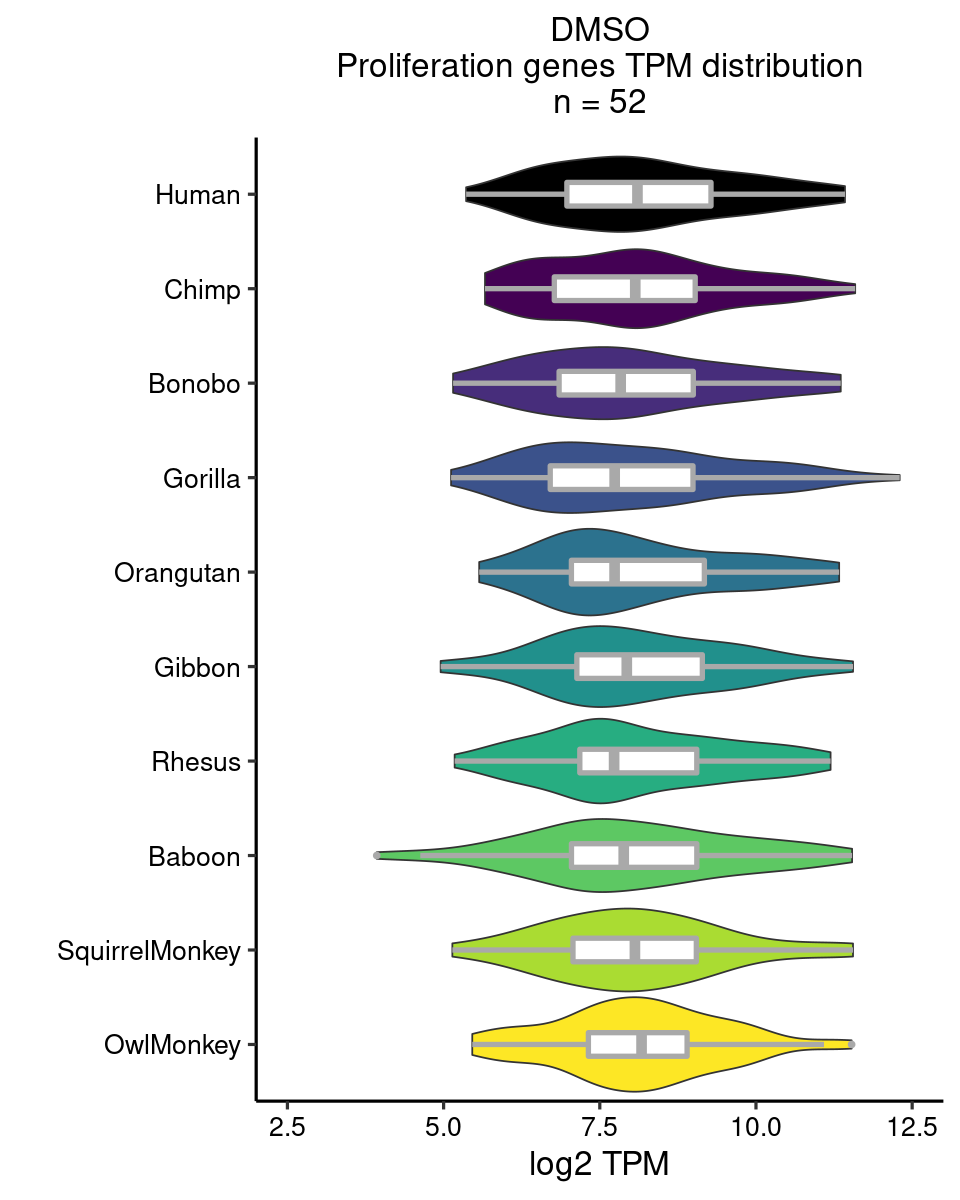

In [8]:
##############################################
                # DMSO values
##############################################

# Plots PI genes TPM distributions per species.

# Reformats TPM dataframe onto long format.
DMSO_TPM_PI_species_long <- gather(DMSO_TPM_PI_species, key = "species", value = "TPM")
# Change species order for plotting.
DMSO_TPM_PI_species_long$species <- factor(DMSO_TPM_PI_species_long$species, 
                                      levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                     "Orangutan","Gibbon","Rhesus","Baboon",
                                                     "SquirrelMonkey","OwlMonkey")))

# Plots violin plot horizontally.
options(repr.plot.width = 8, repr.plot.height = 10)
ggplot() + 
    geom_violin(data = DMSO_TPM_PI_species_long, aes(x = species, y = log2(TPM), fill = species), width = 1) +
    geom_boxplot(data = DMSO_TPM_PI_species_long, aes(x = species, y = log2(TPM)), width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 1.5) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 20, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rev(append("black", viridis(length(levels(DMSO_TPM_PI_species_long$species))-1)))) +
    coord_flip() +
    labs(title = paste0("DMSO\nProliferation genes TPM distribution\nn = ", dim(DMSO_TPM_PI_species)[1]),
       x = "",
       y = "log2 TPM")

Warning message:
“Removed 7 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”


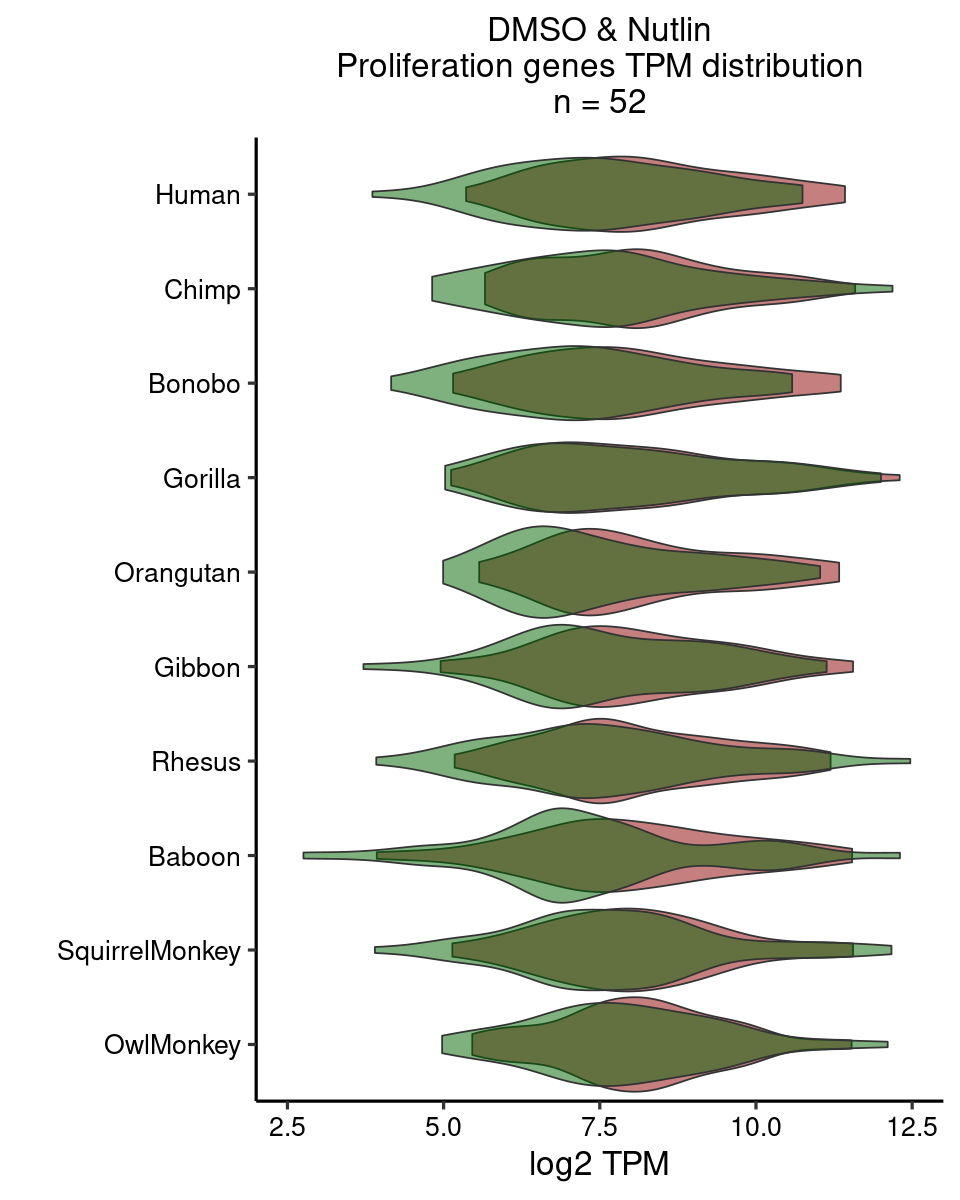

In [10]:
##############################################
       # Overlaid DMSO and Nutlin values
##############################################

# Plots PI genes TPM distributions per species.

# Reformats TPM dataframe onto long format.
DMSO_TPM_PI_species_long <- gather(DMSO_TPM_PI_species, key = "species", value = "TPM")
Nutlin_TPM_PI_species_long <- gather(Nutlin_TPM_PI_species, key = "species", value = "TPM")
# Change species order for plotting.
DMSO_TPM_PI_species_long$species <- factor(DMSO_TPM_PI_species_long$species, 
                                      levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                     "Orangutan","Gibbon","Rhesus","Baboon",
                                                     "SquirrelMonkey","OwlMonkey")))
Nutlin_TPM_PI_species_long$species <- factor(Nutlin_TPM_PI_species_long$species, 
                                      levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                     "Orangutan","Gibbon","Rhesus","Baboon",
                                                     "SquirrelMonkey","OwlMonkey")))

# Plots violin plot horizontally.
options(repr.plot.width = 8, repr.plot.height = 10)
ggplot() + 
    geom_violin(data = DMSO_TPM_PI_species_long, aes(x = species, y = log2(TPM), fill = "DMSO"), width = 1, alpha = 0.5) +
    geom_violin(data = Nutlin_TPM_PI_species_long, aes(x = species, y = log2(TPM), fill = "Nutlin"), width = 1, alpha = 0.5) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none",
          plot.title = element_text(size = 20, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(name = "",values = c(DMSO = "darkred", Nutlin = "darkgreen")) +
    coord_flip() +
    labs(title = paste0("DMSO & Nutlin\nProliferation genes TPM distribution\nn = ", dim(Nutlin_TPM_PI_species)[1]),
       x = "",
       y = "log2 TPM")

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”


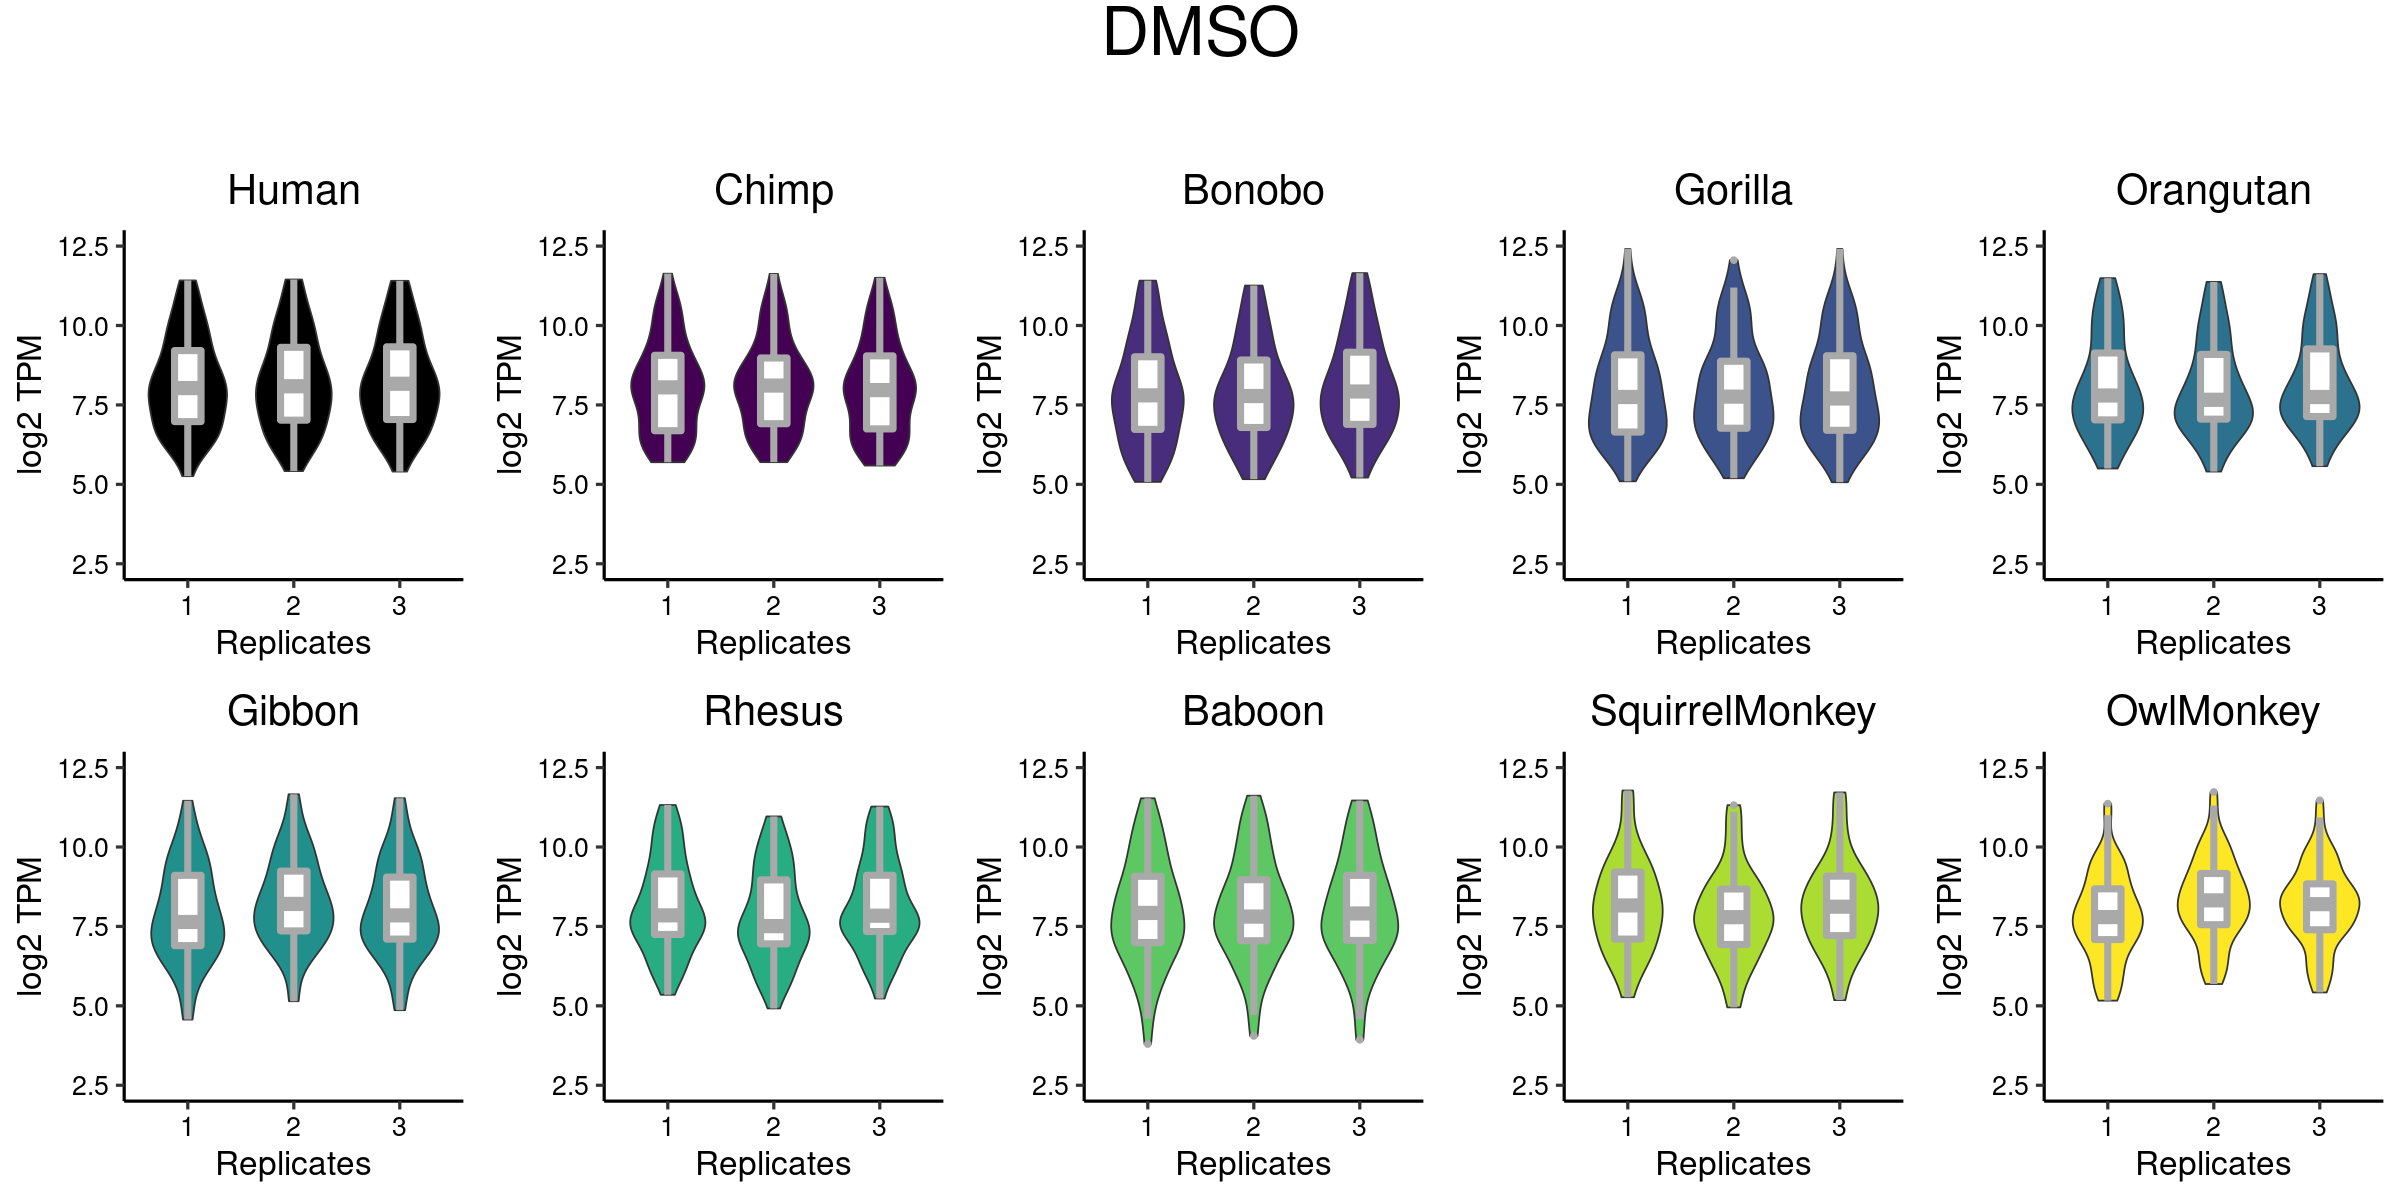

In [11]:
##############################################
##############################################
                # DMSO values
##############################################
##############################################

# Creates color scheme data frame that matches species with their color.

speciesList <- c("Human","Chimp","Bonobo","Gorilla","Orangutan",
                 "Gibbon","Rhesus","Baboon","SquirrelMonkey","OwlMonkey")

colorScheme <- data.frame(matrix(ncol = 1, nrow = length(speciesList)))
colnames(colorScheme) <- "colorCode"
rownames(colorScheme) <- speciesList
colorScheme$colorCode <- append("black",viridis(9))

################################################
                    # Human
################################################

Human_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Human", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Human", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Human", drop = FALSE])
colnames(Human_DMSO_TPM_PI) <- c("1","2","3")
Human_DMSO_TPM_PI_long <- gather(Human_DMSO_TPM_PI, key = "replicate", value = "TPM")

Human_plot <- ggplot(data = Human_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Human",], 3)) +
    labs(title = "Human",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Chimp
################################################

Chimp_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Chimp", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Chimp", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Chimp", drop = FALSE])
colnames(Chimp_DMSO_TPM_PI) <- c("1","2","3")
Chimp_DMSO_TPM_PI_long <- gather(Chimp_DMSO_TPM_PI, key = "replicate", value = "TPM")

Chimp_plot <- ggplot(data = Chimp_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Chimp",], 3)) +
    labs(title = "Chimp",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Bonobo
################################################

Bonobo_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Bonobo", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Bonobo", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Bonobo", drop = FALSE])
colnames(Bonobo_DMSO_TPM_PI) <- c("1","2","3")
Bonobo_DMSO_TPM_PI_long <- gather(Bonobo_DMSO_TPM_PI, key = "replicate", value = "TPM")

Bonobo_plot <- ggplot(data = Bonobo_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Bonobo",], 3)) +
    labs(title = "Bonobo",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Gorilla
################################################

Gorilla_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Gorilla", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Gorilla", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Gorilla", drop = FALSE])
colnames(Gorilla_DMSO_TPM_PI) <- c("1","2","3")
Gorilla_DMSO_TPM_PI_long <- gather(Gorilla_DMSO_TPM_PI, key = "replicate", value = "TPM")

Gorilla_plot <- ggplot(data = Gorilla_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Gorilla",], 3)) +
    labs(title = "Gorilla",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Orangutan
################################################

Orangutan_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Orangutan", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Orangutan", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Orangutan", drop = FALSE])
colnames(Orangutan_DMSO_TPM_PI) <- c("1","2","3")
Orangutan_DMSO_TPM_PI_long <- gather(Orangutan_DMSO_TPM_PI, key = "replicate", value = "TPM")

Orangutan_plot <- ggplot(data = Orangutan_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Orangutan",], 3)) +
    labs(title = "Orangutan",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Gibbon
################################################

Gibbon_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Gibbon", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Gibbon", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Gibbon", drop = FALSE])
colnames(Gibbon_DMSO_TPM_PI) <- c("1","2","3")
Gibbon_DMSO_TPM_PI_long <- gather(Gibbon_DMSO_TPM_PI, key = "replicate", value = "TPM")

Gibbon_plot <- ggplot(data = Gibbon_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Gibbon",], 3)) +
    labs(title = "Gibbon",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Rhesus
################################################

Rhesus_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Rhesus", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Rhesus", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Rhesus", drop = FALSE])
colnames(Rhesus_DMSO_TPM_PI) <- c("1","2","3")
Rhesus_DMSO_TPM_PI_long <- gather(Rhesus_DMSO_TPM_PI, key = "replicate", value = "TPM")

Rhesus_plot <- ggplot(data = Rhesus_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Rhesus",], 3)) +
    labs(title = "Rhesus",
       x = "Replicates",
       y = "log2 TPM")

################################################
                    # Baboon
################################################

Baboon_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"Baboon", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"Baboon", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"Baboon", drop = FALSE])
colnames(Baboon_DMSO_TPM_PI) <- c("1","2","3")
Baboon_DMSO_TPM_PI_long <- gather(Baboon_DMSO_TPM_PI, key = "replicate", value = "TPM")

Baboon_plot <- ggplot(data = Baboon_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["Baboon",], 3)) +
    labs(title = "Baboon",
       x = "Replicates",
       y = "log2 TPM")

################################################
                # SquirrelMonkey
################################################

SquirrelMonkey_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"SquirrelMonkey", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"SquirrelMonkey", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"SquirrelMonkey", drop = FALSE])
colnames(SquirrelMonkey_DMSO_TPM_PI) <- c("1","2","3")
SquirrelMonkey_DMSO_TPM_PI_long <- gather(SquirrelMonkey_DMSO_TPM_PI, key = "replicate", value = "TPM")

SquirrelMonkey_plot <- ggplot(data = SquirrelMonkey_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["SquirrelMonkey",], 3)) +
    labs(title = "SquirrelMonkey",
       x = "Replicates",
       y = "log2 TPM")

################################################
                   # OwlMonkey
################################################

OwlMonkey_DMSO_TPM_PI <- cbind(DMSO_TPM_PI_1_species[,"OwlMonkey", drop = FALSE],
                      DMSO_TPM_PI_2_species[,"OwlMonkey", drop = FALSE],
                      DMSO_TPM_PI_3_species[,"OwlMonkey", drop = FALSE])
colnames(OwlMonkey_DMSO_TPM_PI) <- c("1","2","3")
OwlMonkey_DMSO_TPM_PI_long <- gather(OwlMonkey_DMSO_TPM_PI, key = "replicate", value = "TPM")

OwlMonkey_plot <- ggplot(data = OwlMonkey_DMSO_TPM_PI_long, aes(x = replicate, y = log2(TPM), fill = replicate)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(2.5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep(colorScheme["OwlMonkey",], 3)) +
    labs(title = "OwlMonkey",
       x = "Replicates",
       y = "log2 TPM")

################################################
                   # Plotting
################################################

options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(Human_plot, Chimp_plot, Bonobo_plot, Gorilla_plot, Orangutan_plot,
             Gibbon_plot, Rhesus_plot, Baboon_plot, SquirrelMonkey_plot, OwlMonkey_plot,
             ncol = 5, nrow = 2,
             top = textGrob("DMSO\n", gp = gpar(fontsize = 40)))

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


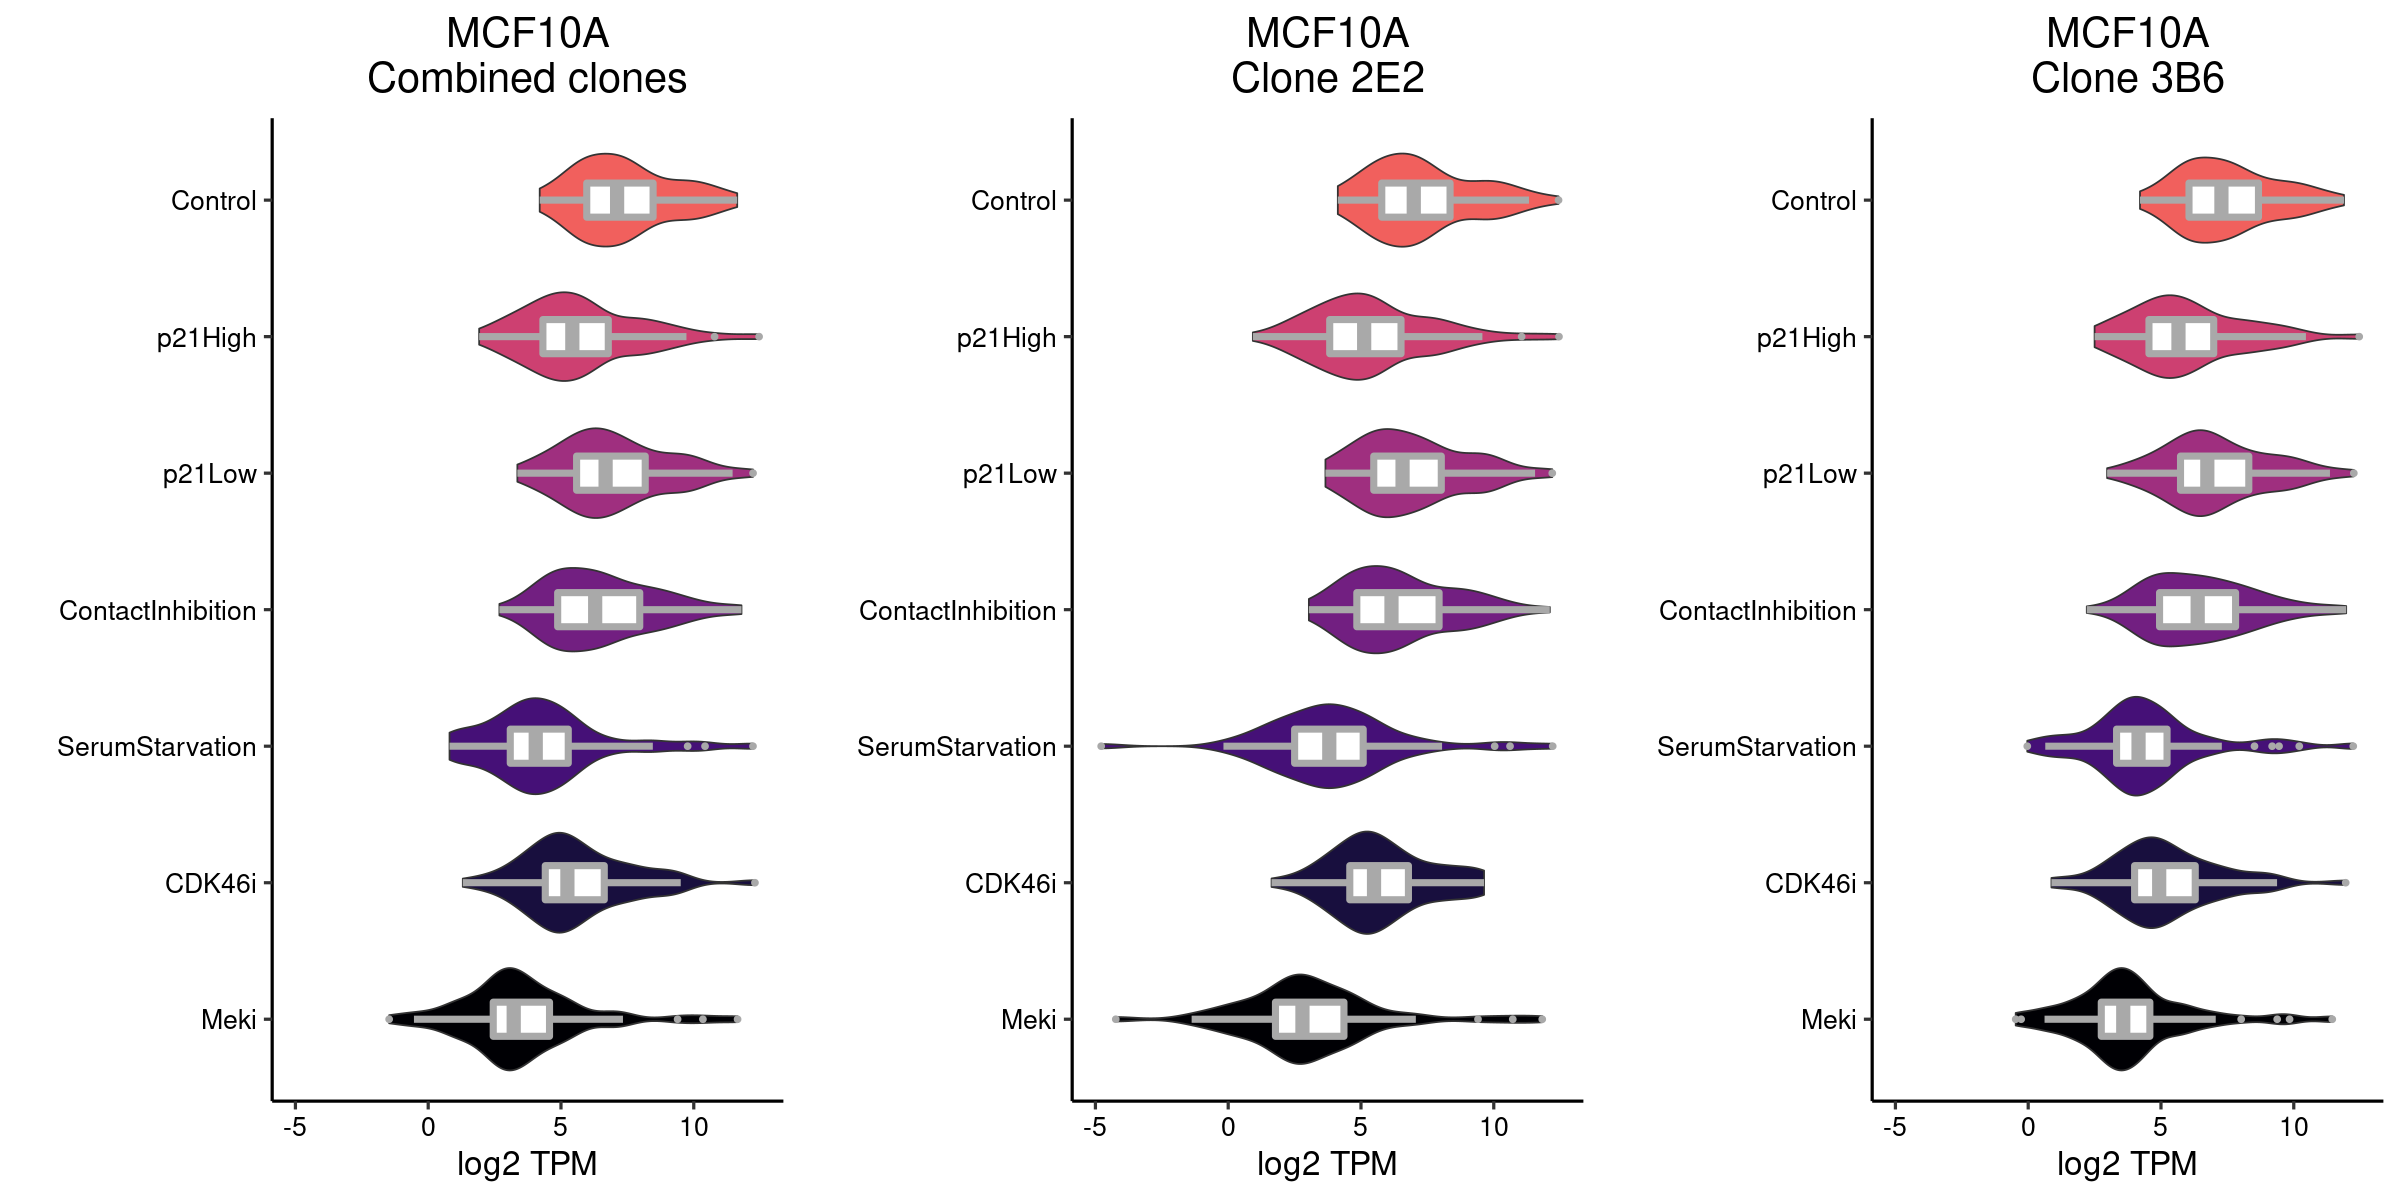

In [13]:
# Read in RNA-seq count data and their conditions table.
commonPath <- "/Shares/txpnevol/daniel/RNA-seq_MCF10A_Min2019/featureCounts"
load(paste0(commonPath,"/RNA-MCF10A-Min2019.standard10.featureCounts.RData"))
conditionsTableRNA <- read.csv(paste0(commonPath,"/conditionsTable.RNA-MCF10A-Min2019.csv"), header=TRUE)

# Assign the same ID to both the RNA-seq conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
countsControls <- counts$counts

# Initializes dataframes that will contain the TPM (and intermediates).
RPK_Controls <- data.frame(matrix(ncol = dim(countsControls)[2], nrow = dim(countsControls)[1]))
colnames(RPK_Controls) <- colnames(countsControls)
rownames(RPK_Controls) <- rownames(countsControls)
TPM_Controls <- data.frame(matrix(ncol = dim(countsControls)[2], nrow = dim(countsControls)[1]))
colnames(TPM_Controls) <- colnames(countsControls)
rownames(TPM_Controls) <- rownames(countsControls)
PM_Controls <- data.frame(matrix(ncol = dim(countsControls)[2], nrow = 1))
colnames(PM_Controls) <- colnames(countsControls)
rownames(PM_Controls) <- "PM"

# Divides the raw gene read counts by the wholeLength of the gene to obtain RPK.
for(gene in rownames(countsControls)) {
    if(!(gene %in% species_10_geneList_wholeLengths_kb$name)) { next }
    RPK_Controls[gene,] <- countsControls[gene,] / 
    species_10_geneList_wholeLengths_kb[species_10_geneList_wholeLengths_kb$name == gene, "Human"] }

# Obtains the "per Million" scaling factor by adding up the RPK per sample and dividing by 1,000,000
for(sample in colnames(PM_Controls)) {
    PM_Controls["PM",sample] <- (sum(RPK_Controls[,sample], na.rm = TRUE)) / 1000000}

# Divides all the RPK values by the 'per Million' scaling factor to obtain TPM values.
for(sample in colnames(TPM_Controls)) {
    TPM_Controls[,sample] <- RPK_Controls[,sample]/PM_Controls["PM",sample] }

# Keeps only PI genes in TPM table.
TPM_Controls <- TPM_Controls[genes_PI,]

################################################
              # Combined clones
################################################

# Averages the TPM per experiment type.
experiments <- c("Control","p21High","p21Low","ContactInhibition","SerumStarvation","CDK46i","Meki")
TPM_Controls_merged <- data.frame(matrix(ncol = length(experiments), nrow = dim(TPM_Controls)[1]))
colnames(TPM_Controls_merged) <- experiments
rownames(TPM_Controls_merged) <- rownames(TPM_Controls)
TPM_Controls_merged$Control <- rowMeans(TPM_Controls[,grepl("Control",colnames(TPM_Controls))])
TPM_Controls_merged$p21High <- rowMeans(TPM_Controls[,grepl("p21-high",colnames(TPM_Controls))])
TPM_Controls_merged$p21Low <- rowMeans(TPM_Controls[,grepl("p21-low",colnames(TPM_Controls))])
TPM_Controls_merged$ContactInhibition <- rowMeans(TPM_Controls[,grepl("ContactIn",colnames(TPM_Controls))])
TPM_Controls_merged$SerumStarvation <- rowMeans(TPM_Controls[,grepl("SerumStarvation",colnames(TPM_Controls))])
TPM_Controls_merged$CDK46i <- rowMeans(TPM_Controls[,grepl("CDK46i",colnames(TPM_Controls))])
TPM_Controls_merged$Meki <- rowMeans(TPM_Controls[,grepl("Meki",colnames(TPM_Controls))])


TPM_Controls_merged_long <- gather(TPM_Controls_merged, key = "experiment", value = "TPM")
TPM_Controls_merged_long$experiment <- factor(TPM_Controls_merged_long$experiment, 
                                      levels = rev(c("Control","p21High","p21Low","ContactInhibition",
                                                     "SerumStarvation","CDK46i","Meki")))
plot_merged <- ggplot(data = TPM_Controls_merged_long, aes(x = experiment, y = log2(TPM), fill = experiment)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = magma(10)[1:7]) +
    coord_flip() +
    labs(title = "MCF10A\nCombined clones",
       x = "",
       y = "log2 TPM")

################################################
                  # Clone 2E2
################################################

# Separate TPM table per cell clone.
TPM_Controls_2E2_all <- TPM_Controls[,grepl("2E2",colnames(TPM_Controls))]

# Averages the TPM per experiment type.
experiments <- c("Control","p21High","p21Low","ContactInhibition","SerumStarvation","CDK46i","Meki")
TPM_Controls_2E2 <- data.frame(matrix(ncol = length(experiments), nrow = dim(TPM_Controls_2E2_all)[1]))
colnames(TPM_Controls_2E2) <- experiments
rownames(TPM_Controls_2E2) <- rownames(TPM_Controls_2E2_all)
TPM_Controls_2E2$Control <- rowMeans(TPM_Controls_2E2_all[,grepl("Control",colnames(TPM_Controls_2E2_all))])
TPM_Controls_2E2$p21High <- rowMeans(TPM_Controls_2E2_all[,grepl("p21-high",colnames(TPM_Controls_2E2_all))])
TPM_Controls_2E2$p21Low <- rowMeans(TPM_Controls_2E2_all[,grepl("p21-low",colnames(TPM_Controls_2E2_all))])
TPM_Controls_2E2$ContactInhibition <- rowMeans(TPM_Controls_2E2_all[,grepl("ContactIn",colnames(TPM_Controls_2E2_all))])
TPM_Controls_2E2$SerumStarvation <- rowMeans(TPM_Controls_2E2_all[,grepl("SerumStarvation",colnames(TPM_Controls_2E2_all))])
TPM_Controls_2E2$CDK46i <- rowMeans(TPM_Controls_2E2_all[,grepl("CDK46i",colnames(TPM_Controls_2E2_all))])
TPM_Controls_2E2$Meki <- rowMeans(TPM_Controls_2E2_all[,grepl("Meki",colnames(TPM_Controls_2E2_all))])


TPM_Controls_2E2_long <- gather(TPM_Controls_2E2, key = "experiment", value = "TPM")
TPM_Controls_2E2_long$experiment <- factor(TPM_Controls_2E2_long$experiment, 
                                      levels = rev(c("Control","p21High","p21Low","ContactInhibition",
                                                     "SerumStarvation","CDK46i","Meki")))
plot_2E2 <- ggplot(data = TPM_Controls_2E2_long, aes(x = experiment, y = log2(TPM), fill = experiment)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = magma(10)[1:7]) +
    coord_flip() +
    labs(title = "MCF10A\nClone 2E2",
       x = "",
       y = "log2 TPM")

################################################
                  # Clone 3B6
################################################

# Separate TPM table per cell clone.
TPM_Controls_3B6_all <- TPM_Controls[,grepl("3B6",colnames(TPM_Controls))]

# Averages the TPM per experiment type.
experiments <- c("Control","p21High","p21Low","ContactInhibition","SerumStarvation","CDK46i","Meki")
TPM_Controls_3B6 <- data.frame(matrix(ncol = length(experiments), nrow = dim(TPM_Controls_3B6_all)[1]))
colnames(TPM_Controls_3B6) <- experiments
rownames(TPM_Controls_3B6) <- rownames(TPM_Controls_3B6_all)
TPM_Controls_3B6$Control <- rowMeans(TPM_Controls_3B6_all[,grepl("Control",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6$p21High <- rowMeans(TPM_Controls_3B6_all[,grepl("p21-high",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6$p21Low <- rowMeans(TPM_Controls_3B6_all[,grepl("p21-low",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6$ContactInhibition <- rowMeans(TPM_Controls_3B6_all[,grepl("ContactIn",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6$SerumStarvation <- rowMeans(TPM_Controls_3B6_all[,grepl("SerumStarvation",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6$CDK46i <- rowMeans(TPM_Controls_3B6_all[,grepl("CDK46i",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6$Meki <- rowMeans(TPM_Controls_3B6_all[,grepl("Meki",colnames(TPM_Controls_3B6_all))])
TPM_Controls_3B6_long <- gather(TPM_Controls_3B6, key = "experiment", value = "TPM")

TPM_Controls_3B6_long <- gather(TPM_Controls_3B6, key = "experiment", value = "TPM")
TPM_Controls_3B6_long$experiment <- factor(TPM_Controls_3B6_long$experiment, 
                                      levels = rev(c("Control","p21High","p21Low","ContactInhibition",
                                                     "SerumStarvation","CDK46i","Meki")))
plot_3B6 <- ggplot(data = TPM_Controls_3B6_long, aes(x = experiment, y = log2(TPM), fill = experiment)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = magma(10)[1:7]) +
    coord_flip() +
    labs(title = "MCF10A\nClone 3B6",
       x = "",
       y = "log2 TPM")

################################################
                   # Plotting
################################################

options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(plot_merged, plot_2E2, plot_3B6,
             ncol = 3, nrow = 1)

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


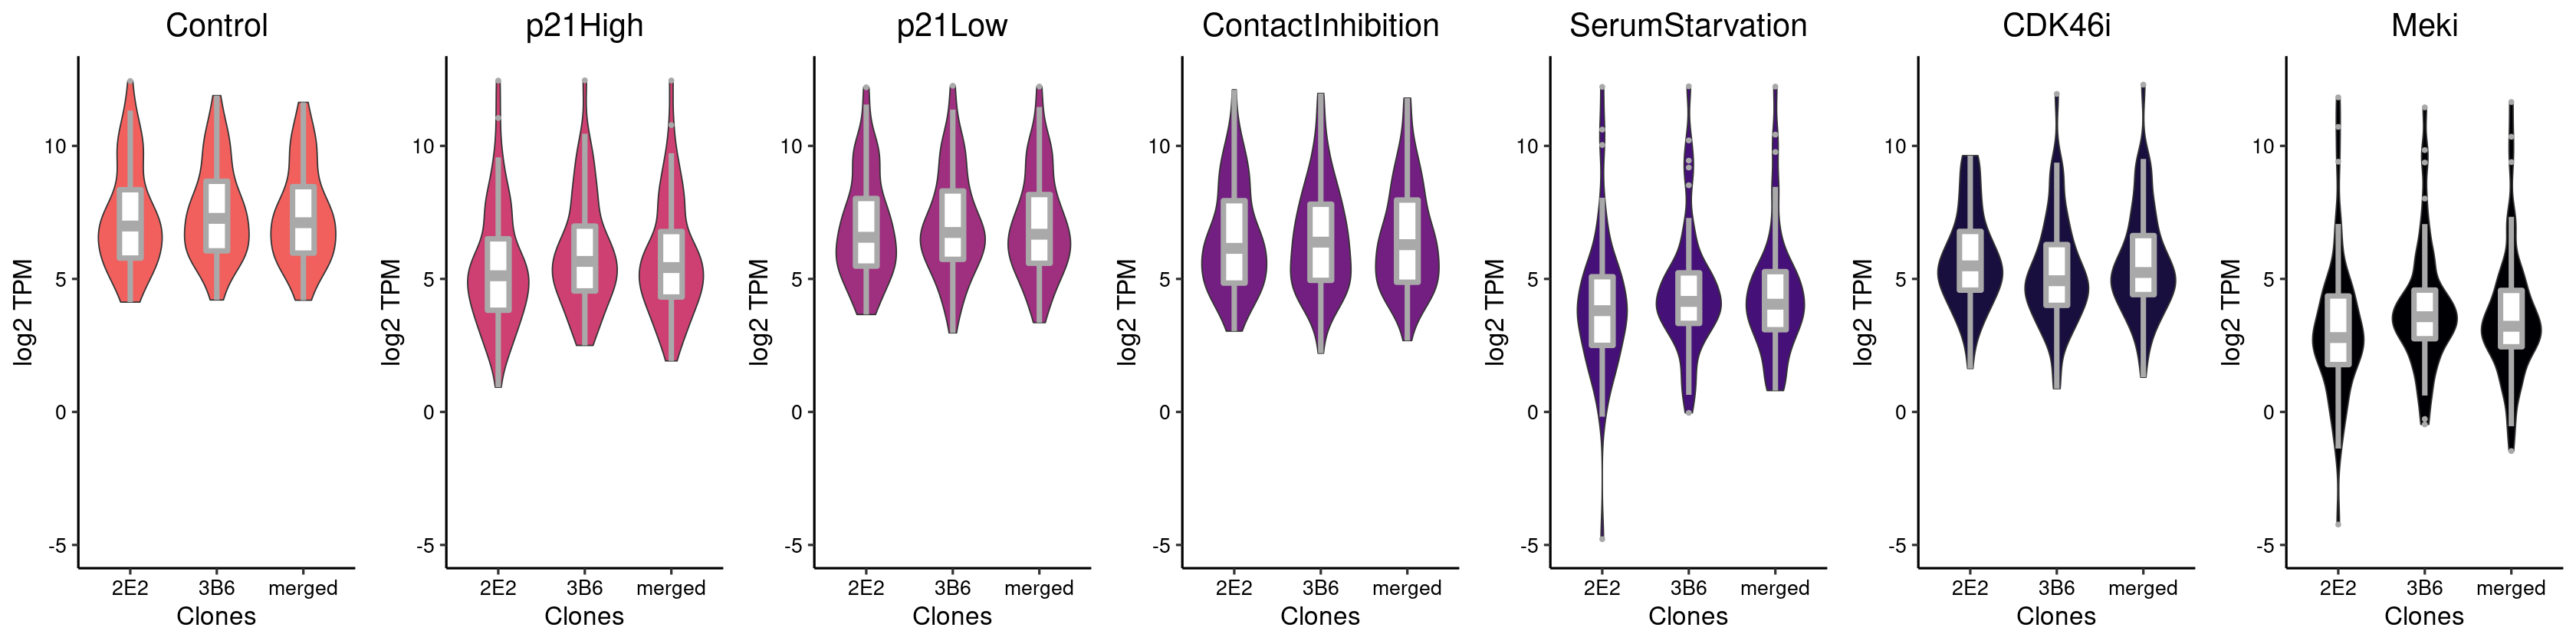

In [14]:
################################################
                   # Control
################################################

Control_TPM_PI <- cbind(TPM_Controls_merged[,"Control", drop = FALSE],
                        TPM_Controls_2E2[,"Control", drop = FALSE],
                        TPM_Controls_3B6[,"Control", drop = FALSE])
colnames(Control_TPM_PI) <- c("merged","2E2","3B6")
Control_TPM_PI_long <- gather(Control_TPM_PI, key = "clone", value = "TPM")

Control_plot <- ggplot(data = Control_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#F1605DFF",3)) +
    labs(title = "Control",
       x = "Clones",
       y = "log2 TPM")

################################################
                   # p21High
################################################

p21High_TPM_PI <- cbind(TPM_Controls_merged[,"p21High", drop = FALSE],
                        TPM_Controls_2E2[,"p21High", drop = FALSE],
                        TPM_Controls_3B6[,"p21High", drop = FALSE])
colnames(p21High_TPM_PI) <- c("merged","2E2","3B6")
p21High_TPM_PI_long <- gather(p21High_TPM_PI, key = "clone", value = "TPM")

p21High_plot <- ggplot(data = p21High_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#CD4071FF",3)) +
    labs(title = "p21High",
       x = "Clones",
       y = "log2 TPM")

################################################
                   # p21Low
################################################

p21Low_TPM_PI <- cbind(TPM_Controls_merged[,"p21Low", drop = FALSE],
                        TPM_Controls_2E2[,"p21Low", drop = FALSE],
                        TPM_Controls_3B6[,"p21Low", drop = FALSE])
colnames(p21Low_TPM_PI) <- c("merged","2E2","3B6")
p21Low_TPM_PI_long <- gather(p21Low_TPM_PI, key = "clone", value = "TPM")

p21Low_plot <- ggplot(data = p21Low_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#9F2F7FFF",3)) +
    labs(title = "p21Low",
       x = "Clones",
       y = "log2 TPM")

################################################
               # ContactInhibition
################################################

ContactInhibition_TPM_PI <- cbind(TPM_Controls_merged[,"ContactInhibition", drop = FALSE],
                        TPM_Controls_2E2[,"ContactInhibition", drop = FALSE],
                        TPM_Controls_3B6[,"ContactInhibition", drop = FALSE])
colnames(ContactInhibition_TPM_PI) <- c("merged","2E2","3B6")
ContactInhibition_TPM_PI_long <- gather(ContactInhibition_TPM_PI, key = "clone", value = "TPM")

ContactInhibition_plot <- ggplot(data = ContactInhibition_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#721F81FF",3)) +
    labs(title = "ContactInhibition",
       x = "Clones",
       y = "log2 TPM")

################################################
                # SerumStarvation
################################################

SerumStarvation_TPM_PI <- cbind(TPM_Controls_merged[,"SerumStarvation", drop = FALSE],
                        TPM_Controls_2E2[,"SerumStarvation", drop = FALSE],
                        TPM_Controls_3B6[,"SerumStarvation", drop = FALSE])
colnames(SerumStarvation_TPM_PI) <- c("merged","2E2","3B6")
SerumStarvation_TPM_PI_long <- gather(SerumStarvation_TPM_PI, key = "clone", value = "TPM")

SerumStarvation_plot <- ggplot(data = SerumStarvation_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#451077FF",3)) +
    labs(title = "SerumStarvation",
       x = "Clones",
       y = "log2 TPM")

################################################
                   # CDK46i
################################################

CDK46i_TPM_PI <- cbind(TPM_Controls_merged[,"CDK46i", drop = FALSE],
                        TPM_Controls_2E2[,"CDK46i", drop = FALSE],
                        TPM_Controls_3B6[,"CDK46i", drop = FALSE])
colnames(CDK46i_TPM_PI) <- c("merged","2E2","3B6")
CDK46i_TPM_PI_long <- gather(CDK46i_TPM_PI, key = "clone", value = "TPM")

CDK46i_plot <- ggplot(data = CDK46i_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#180F3EFF",3)) +
    labs(title = "CDK46i",
       x = "Clones",
       y = "log2 TPM")

################################################
                     # Meki
################################################

Meki_TPM_PI <- cbind(TPM_Controls_merged[,"Meki", drop = FALSE],
                        TPM_Controls_2E2[,"Meki", drop = FALSE],
                        TPM_Controls_3B6[,"Meki", drop = FALSE])
colnames(Meki_TPM_PI) <- c("merged","2E2","3B6")
Meki_TPM_PI_long <- gather(Meki_TPM_PI, key = "clone", value = "TPM")

Meki_plot <- ggplot(data = Meki_TPM_PI_long, aes(x = clone, y = log2(TPM), fill = clone)) + 
    geom_violin(width = 0.75) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 2) +
    theme_classic(base_size = 20) +
    scale_y_continuous(limits = c(-5, 12.5)) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 25, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black"),
        axis.text.x = element_text(color = "black"),
        axis.title.x = element_text(color = "black", hjust = 0.5)) +
    scale_fill_manual(values = rep("#000004FF",3)) +
    labs(title = "Meki",
       x = "Clones",
       y = "log2 TPM")

################################################
                   # Plotting
################################################

options(repr.plot.width = 28, repr.plot.height = 7)
grid.arrange(Control_plot, p21High_plot, p21Low_plot, ContactInhibition_plot, 
             SerumStarvation_plot, CDK46i_plot, Meki_plot,
             ncol = 7, nrow = 1)

Warning message:
“Removed 8 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”


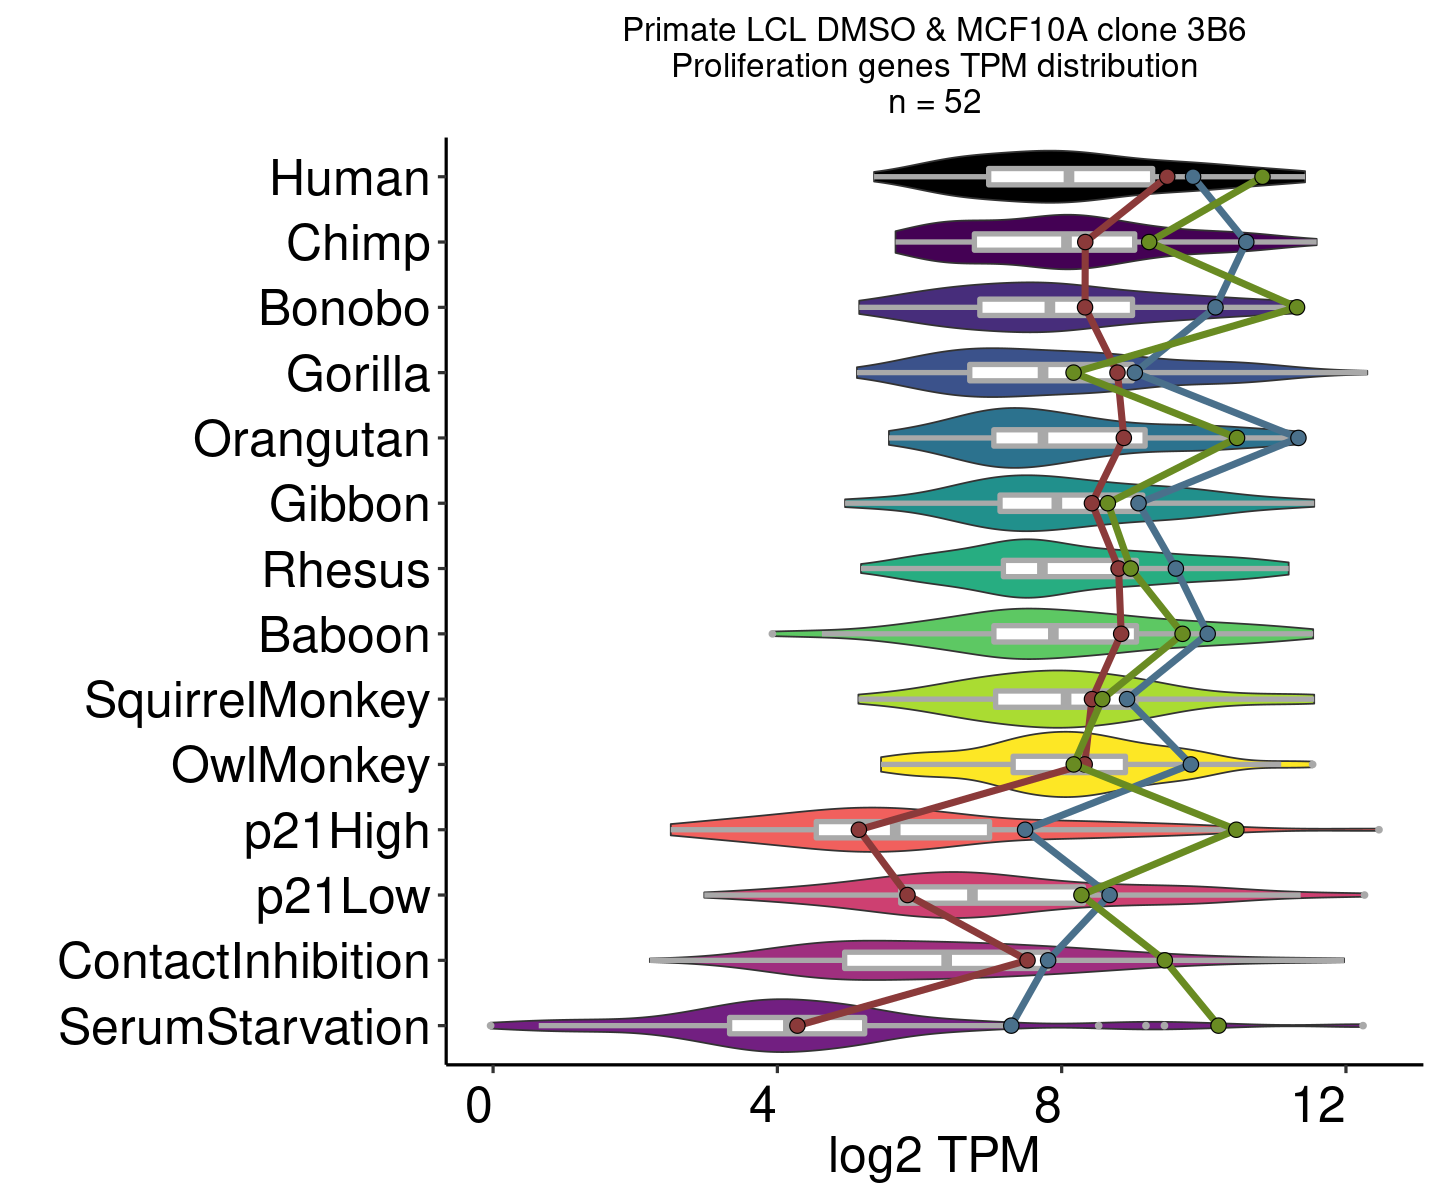

In [16]:
# Plots together the primate LCLs and the MCF10A datasets.

# Merges the datasets.
TPM_PI_species_long_2 <- DMSO_TPM_PI_species_long
colnames(TPM_PI_species_long_2) <- c("sample","TPM")
TPM_Controls_3B6_long_2 <- TPM_Controls_3B6_long
colnames(TPM_Controls_3B6_long_2) <- c("sample","TPM")
all_together_long <- rbind(TPM_PI_species_long_2, TPM_Controls_3B6_long_2)

# Removes the samples "Control", "CDK46i", and "Meki".
all_together_long <- all_together_long[!(all_together_long$sample == "Control"),]
all_together_long <- all_together_long[!(all_together_long$sample == "CDK46i"),]
all_together_long <- all_together_long[!(all_together_long$sample == "Meki"),]

# Reorders the samples.
all_together_long$sample <- factor(all_together_long$sample, 
                                   levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                  "Orangutan","Gibbon","Rhesus","Baboon",
                                                  "SquirrelMonkey","OwlMonkey",
                                                  "p21High","p21Low","ContactInhibition",
                                                  "SerumStarvation")))

# Creates dataframes holding the TPM value of individual genes.
all_together_df <- as.data.frame(t(cbind(DMSO_TPM_PI_species, TPM_Controls_3B6)))

# Removes the samples "Control", "CDK46i", and "Meki".
all_together_df <- all_together_df[!(rownames(all_together_df) == "Control"),]
all_together_df <- all_together_df[!(rownames(all_together_df) == "CDK46i"),]
all_together_df <- all_together_df[!(rownames(all_together_df) == "Meki"),]

all_together_gene1_df <- all_together_df[,"CDK1", drop = FALSE]
all_together_gene1_df$sample <- rownames(all_together_gene1_df)
all_together_gene1_df$sample <- factor(all_together_gene1_df$sample, 
                                      levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                  "Orangutan","Gibbon","Rhesus","Baboon",
                                                  "SquirrelMonkey","OwlMonkey",
                                                  "p21High","p21Low","ContactInhibition",
                                                  "SerumStarvation")))

all_together_gene2_df <- all_together_df[,"CDK2", drop = FALSE]
all_together_gene2_df$sample <- rownames(all_together_gene2_df)
all_together_gene2_df$sample <- factor(all_together_gene2_df$sample, 
                                      levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                  "Orangutan","Gibbon","Rhesus","Baboon",
                                                  "SquirrelMonkey","OwlMonkey",
                                                  "p21High","p21Low","ContactInhibition",
                                                  "SerumStarvation")))

all_together_gene3_df <- all_together_df[,"CDKN1A", drop = FALSE]
all_together_gene3_df$sample <- rownames(all_together_gene3_df)
all_together_gene3_df$sample <- factor(all_together_gene3_df$sample, 
                                      levels = rev(c("Human","Chimp","Bonobo","Gorilla",
                                                  "Orangutan","Gibbon","Rhesus","Baboon",
                                                  "SquirrelMonkey","OwlMonkey",
                                                  "p21High","p21Low","ContactInhibition",
                                                  "SerumStarvation")))

# Plots violin plot horizontally, and overlays a line plot of a single gene across samples.
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(data = all_together_long, aes(x = sample, y = log2(TPM), fill = sample)) + 
    geom_violin(width = 1) +
    geom_boxplot(width = 0.25, color = "darkgrey", alpha = 1, fill = "white", lwd = 1.5) +
    theme_classic(base_size = 20) +
    theme(legend.position = "none", 
        plot.title = element_text(size = 20, color = "black", hjust = 0.5),
        axis.text.y = element_text(color = "black", size = 30),
        axis.text.x = element_text(color = "black", vjust = 0.5, hjust = 1, size = 30),
        axis.title.x = element_text(color = "black", hjust = 0.5, size = 30)) +
    scale_fill_manual(values = rev(append(append("black", viridis(9)),rev(magma(10)[4:7])))) +
    coord_flip() +
    geom_line(data = all_together_gene1_df, mapping = aes(x = sample, y = log2(CDK1), group = 1), size = 2, color = "indianred4") +
    geom_point(data = all_together_gene1_df, mapping = aes(x = sample, y = log2(CDK1)), shape = 21, color = "black", fill = "indianred4", size = 4) +
    geom_line(data = all_together_gene2_df, mapping = aes(x = sample, y = log2(CDK2), group = 1), size = 2, color = "skyblue4") +
    geom_point(data = all_together_gene2_df, mapping = aes(x = sample, y = log2(CDK2)), shape = 21, color = "black", fill = "skyblue4", size = 4) +
    geom_line(data = all_together_gene3_df, mapping = aes(x = sample, y = log2(CDKN1A), group = 1), size = 2, color = "olivedrab4") +
    geom_point(data = all_together_gene3_df, mapping = aes(x = sample, y = log2(CDKN1A)), shape = 21, color = "black", fill = "olivedrab4", size = 4) +
    labs(title = paste0("Primate LCL DMSO & MCF10A clone 3B6\nProliferation genes TPM distribution\nn = ", length(genes_PI)),
       x = "",
       y = "log2 TPM")